In [2]:
# import sys
import numpy as np
import pathlib
import sys

import petsc4py
petsc4py.init(sys.argv)
import dolfin as dl
import hippylib as hl

dl.parameters["form_compiler"]["optimize"]     = True
dl.parameters["form_compiler"]["cpp_optimize"] = True
dl.parameters["form_compiler"]["representation"] = "uflacs"
dl.parameters["form_compiler"]["cpp_optimize_flags"] = "-O3 -ffast-math -march=native"

# for plotting
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=4, rc={"lines.linewidth": 4})
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['axes.unicode_minus'] = False

mpl.rcParams['text.usetex'] = True
# mpl.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath}", r"\usepackage{amssymb}"]

# Allen-Cahn problem

In [1]:
#sys.path.append('TumModel_AllenCahn')

# import
from PDE_model_help import GenericReprBase, NutSource, NutSourceLeftEdge, QoIFn, IC_Tum, TC_Tum, IC_Error_Tum, TC_Error_Tum
from PDE_model_help import Misfit, FullTracer
from PDE_model_help import plot_prior, run_and_compare_approximations
from PDE_model import PDEModel

STATE = 0
PARAMETER = 1

In [3]:
# run_dir = 'run_1/'
# theta0 = [0.2, 0.1, 0.05]
# dt = 0.01
# use_approx = True
# which_est = 0
# noise_variance = np.power(0.01, 2)

# num_samples = 2000
# pcn_s = 0.2
# p_mode = np.array([0.5, 0.1, 0.01, 1.])
# p_sigma = np.array([0.4, 0.4, 0.4, 0.4])
# out_path = '/tmp/TumModel_AllenCahn/' + run_dir

# mcmc_path = run_dir # results in chain_<id> folder

In [4]:
run_dir = 'run_2/'
theta0 = [0.2, 0.1, 0.05]
dt = 0.005
use_approx = True
which_est = 0
noise_variance = np.power(0.01, 2)

num_samples = 2000
pcn_s = 0.2
p_mode = np.array([0.5, 0.1, 0.01, 1.])
p_sigma = np.array([0.4, 0.4, 0.4, 0.4])
out_path = '/tmp/TumModel_AllenCahn/' + run_dir

mcmc_path = run_dir # results in chain_<id> folder

In [9]:
# run_dir = 'run_3/'
# theta0 = [0.2, 0.1, 0.05]
# dt = 0.005
# use_approx = True
# which_est = 0
# noise_variance = np.power(0.0001, 2)

# num_samples = 2000
# pcn_s = 0.3
# p_mode = np.array([0.5, 0.1, 0.01, 1.])
# p_sigma = np.array([0.4, 0.4, 0.4, 0.4])
# out_path = '/tmp/TumModel_AllenCahn/' + run_dir

# mcmc_path = run_dir # results in chain_<id> folder

In [10]:
# run_dir = 'run_4/'
# theta0 = [0.2, 0.1, 0.05]
# dt = 0.005
# use_approx = True
# which_est = 0
# noise_variance = np.power(0.0001, 2)

# num_samples = 2000
# pcn_s = 0.2
# p_mode = np.array([0.5, 0.1, 0.01, 1.])
# p_sigma = np.array([0.4, 0.4, 0.4, 0.4])
# out_path = '/tmp/TumModel_AllenCahn/' + run_dir

# mcmc_path = run_dir # results in chain_<id> folder

In [11]:
# run_dir = 'run_5/'
# theta0 = [0.2, 0.1, 0.05]
# dt = 0.005
# use_approx = True
# which_est = 0
# noise_variance = np.power(0.0001, 2)

# num_samples = 2000
# pcn_s = 0.4
# p_mode = np.array([0.5, 0.1, 0.01, 1.])
# p_sigma = np.array([0.4, 0.4, 0.4, 0.4])
# out_path = '/tmp/TumModel_AllenCahn/' + run_dir

# mcmc_path = run_dir # results in chain_<id> folder

In [12]:
# run_dir = 'run_6/'
# theta0 = [0.2, 0.1, 0.05]
# dt = 0.005
# use_approx = True
# which_est = 0
# noise_variance = np.power(0.001, 2)

# num_samples = 5000
# pcn_s = 0.3
# p_mode = np.array([0.5, 0.1, 0.01, 1.])
# p_sigma = np.array([0.4, 0.4, 0.4, 0.4])
# out_path = '/tmp/TumModel_AllenCahn/' + run_dir

# mcmc_path = run_dir # results in chain_<id> folder

# Create prior

In [5]:
# mcmc chains
chain_ids = [i+1 for i in range(4)]
mcmc_paths_chain = [mcmc_path + 'chain_%d/' % (i) for i in chain_ids]
mcmc_plot_path = mcmc_path
#out_path_chain = '/tmp/TumModel_AllenCahn/plot/'
out_path_chain = mcmc_path + 'plot/'
mcmc_paths_chain

['run_2/chain_1/', 'run_2/chain_2/', 'run_2/chain_3/', 'run_2/chain_4/']

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.


/home/prashant/Dropbox/Work/Simulations/python_works/GoalOrientedModelCalibration/TumModel_AllenCahn/PDE_model_help.py:336: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(samples[:, idx], hist=False, norm_hist = True, ax=axs[row, col])
/home/prashant/Dropbox/Work/Simulations/python_works/GoalOrientedModelCalibration/TumModel_AllenCahn/PDE_model_help.py:359: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updat

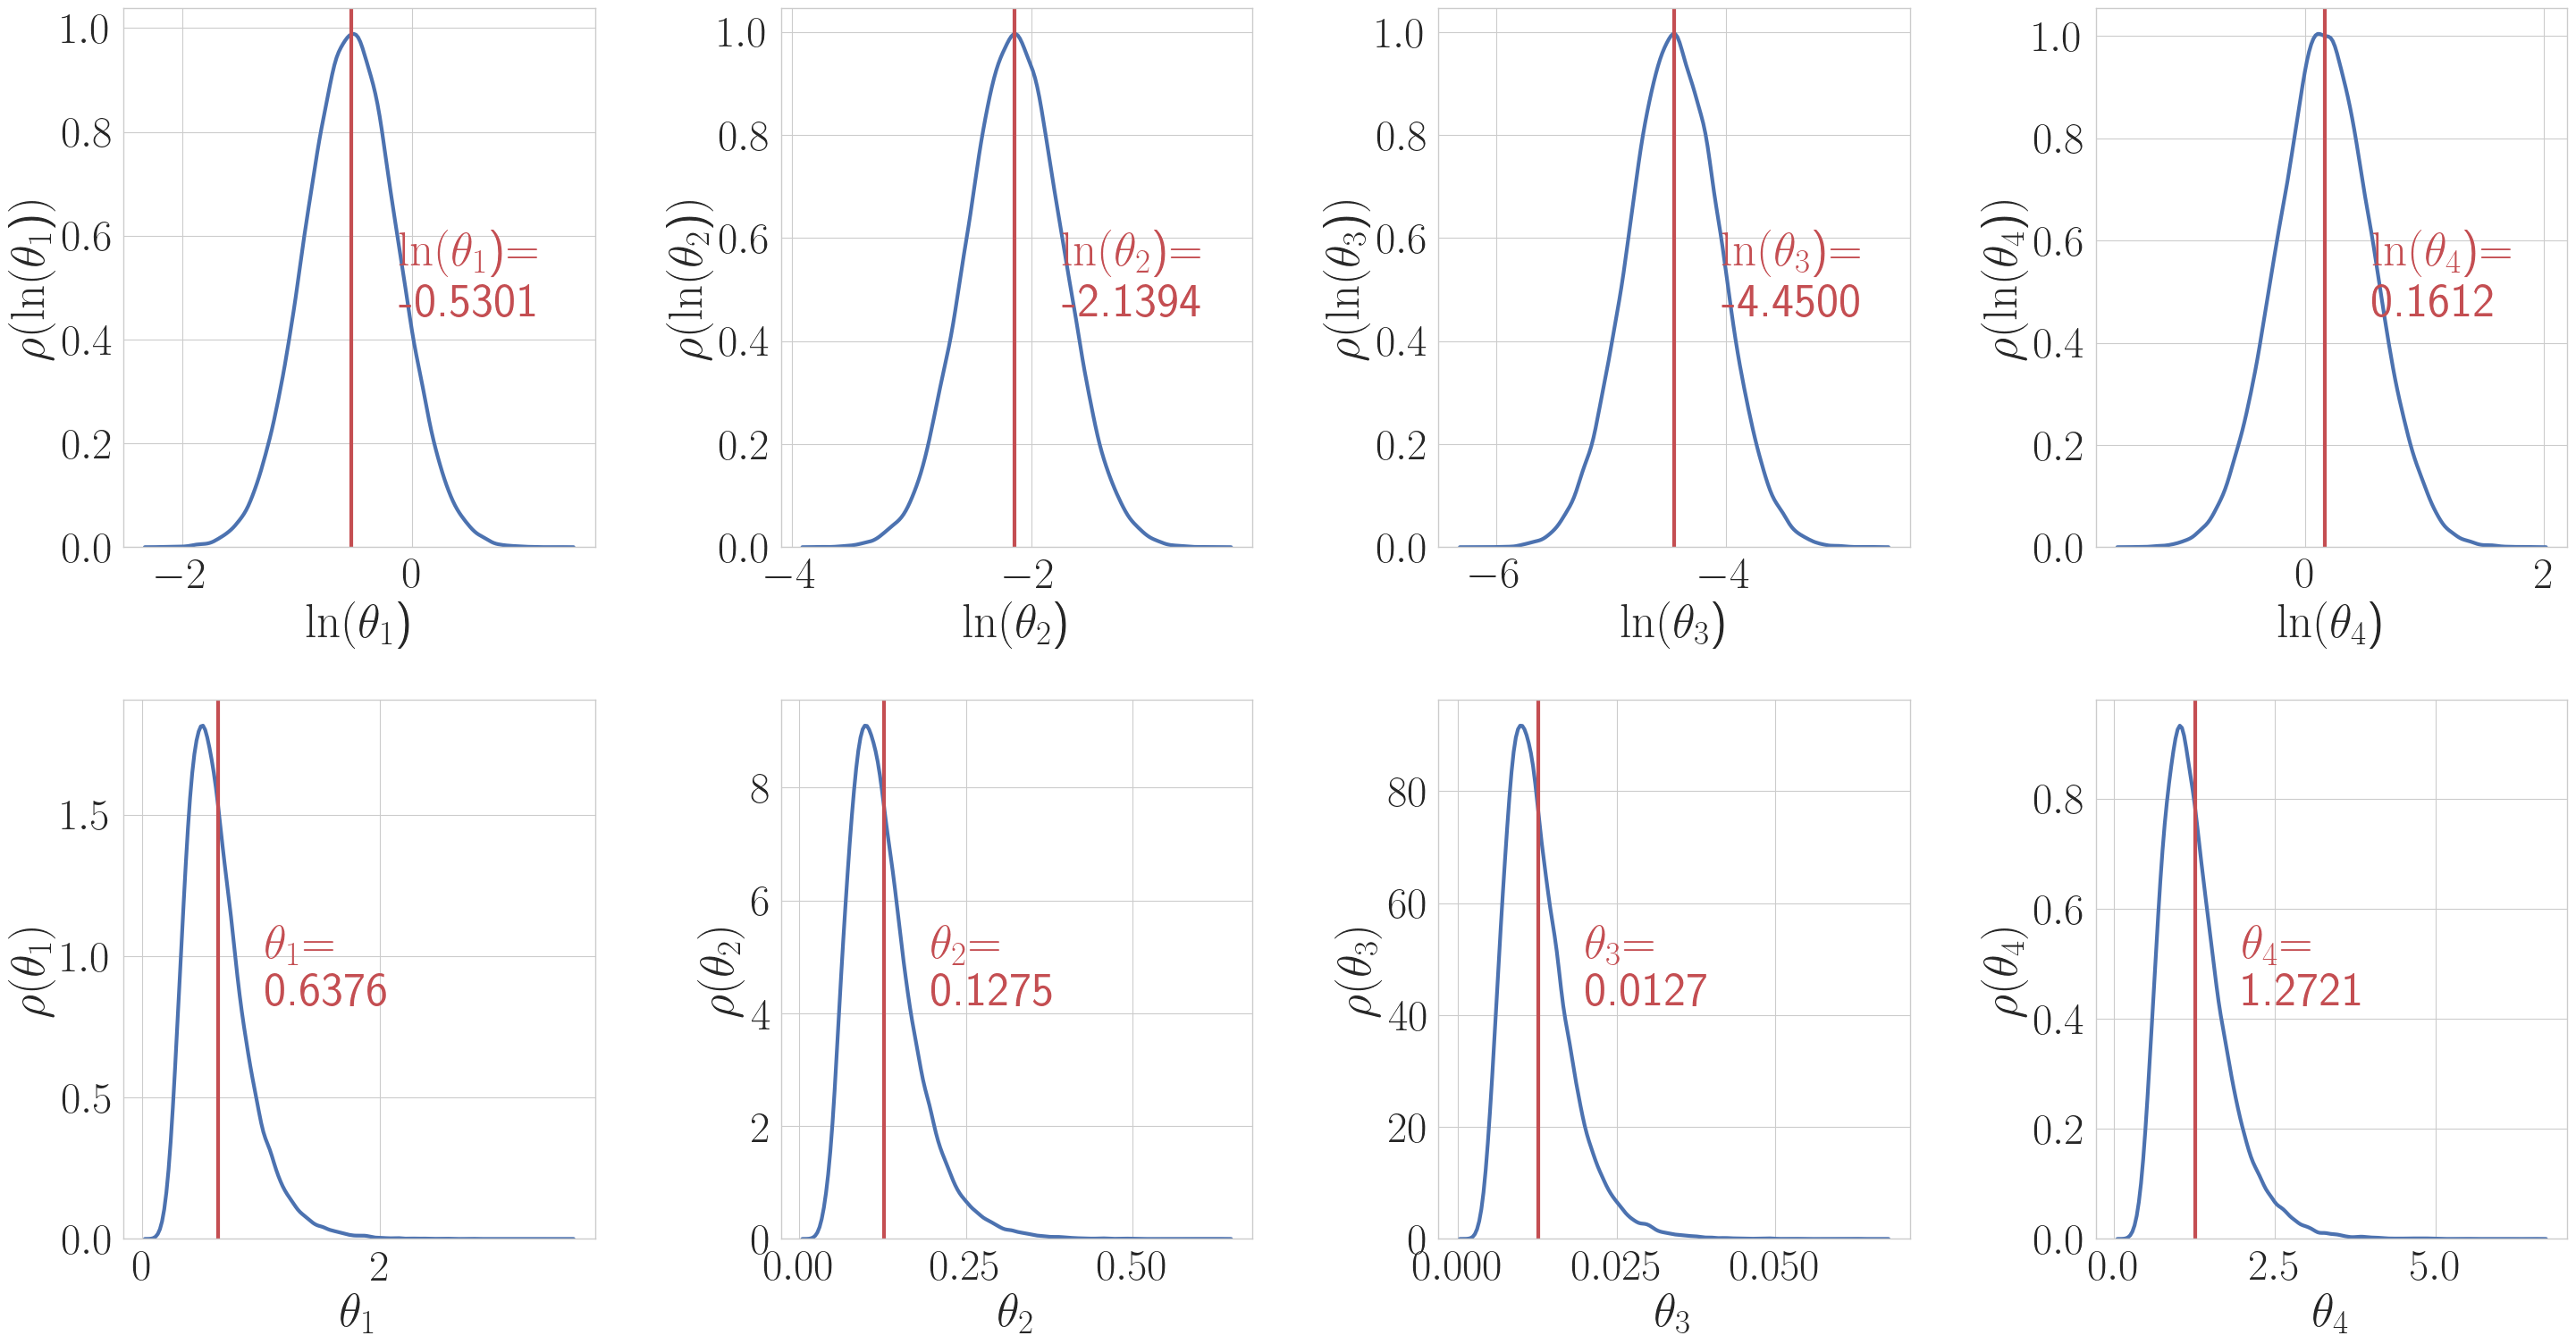

In [6]:
# load mesh
mesh = dl.RectangleMesh(dl.Point(0, 0), dl.Point(1,1), 50, 50)

# FE space
FE_polynomial = 1
Vu = dl.FunctionSpace(mesh, "Lagrange", FE_polynomial)

# Define elements: P1 and real number
P1  = dl.FiniteElement("Lagrange", mesh.ufl_cell(), 2)
R   = dl.FiniteElement("R", mesh.ufl_cell(), 0)

# parameter space
# lam_p, lam_d, eps, C
param_dim = 4
Vh_PARAMETER = dl.VectorFunctionSpace(mesh, "R", degree=0, dim=param_dim)

# Define the state space (solution space) together with parameter space
Vh = [Vu, Vh_PARAMETER, None]

print_freq = 10

# create pde problem
pde = PDEModel(Vh, dt = dt, \
               theta0 = theta0, \
               save = False, out_path = out_path_chain)
pde.print_freq = print_freq

pde.use_approx = use_approx
pde.which_est = which_est

# create misfit function
total_u = np.zeros((1,1))
misfit = Misfit(total_u)
misfit.set_noise_variance([noise_variance], no_scale = True)

# set prior distribution (mode from the validation data in the paper)
p_mean = np.log(p_mode) + p_sigma**2
mean = pde.generate_parameter()
mean.set_local(p_mean)

# prior distribution (lognormal)
prior = hl.GaussianRealPrior(Vh[PARAMETER], np.diag(p_sigma**2), mean=mean)

# plot prior
plot_prior(prior)

# generate prior samples
noise = dl.Vector()
prior.init_vector(noise,"noise")
hl.parRandom.normal(1., noise)
m = dl.Vector()
prior.init_vector(m, 0)
n_samples = 50000
prior_samples = np.empty((n_samples, param_dim))
for i in range(n_samples):
    hl.parRandom.normal(1., noise)
    prior.sample(noise,m)
    prior_samples[i,:] = m.get_local()

# Process results

In [7]:
titles = [r"$\ln(\lambda^p)$", r"$\ln(\lambda^d)$", r"$\ln(\epsilon)$", r"$\ln(C)$"]
titles_real = [r"$\lambda^p$", r"$\lambda^d$", r"$\epsilon$", r"$C$"]

In [8]:
qoi_chains = {}
cost_chains = {}
acc_chains = {}
data_chains = {}
samples_chains = {}

qoi_status = [True for i in range(4)]

qoi, cost, acc, samples = None, None, None, None

total_samples = 0
for i in range(4):
    I = chain_ids[i]
    s = 'chain_%d' % (I)
    
    f = mcmc_paths_chain[i]
    
    # check if file exist
    qoi_exist = False
    f_check = pathlib.Path(f + 'qoi.npy')
    if f_check.is_file():
        qoi_exist = True
    
    if qoi_exist:
        qoi_I = np.load(f + 'qoi.npy')
        cost_I = np.load(f + 'cost.npy')
        acc_I = np.load(f + 'acceptance_rate.npy')
        data_I = np.load(f + 'data.npy')
        samples_I = np.load(f + 'param_samples.npy')

        print('chain = {}, num samples = {}'.format(I, len(qoi_I)))
        total_samples = total_samples + len(qoi_I)

        qoi_chains.update({s: qoi_I})
        cost_chains.update({s: cost_I})
        acc_chains.update({s: acc_I})
        data_chains.update({s: data_I})
        samples_chains.update({s: samples_I})

        if qoi is None:
            qoi = qoi_chains[s]
            cost = cost_chains[s]
            acc = acc_chains[s]
            samples = samples_chains[s]
        else:
            qoi = np.append(qoi, qoi_chains[s], axis = 0)
            cost = np.append(cost, cost_chains[s], axis = 0)
            acc = np.append(acc, acc_chains[s], axis = 0)
            samples = np.append(samples, samples_chains[s], axis = 0)
    else:
        print('chain = {}, num samples = {}'.format(I, 0))
        qoi_status[i] = False
        
        qoi_chains.update({s: None})
        cost_chains.update({s: None})
        acc_chains.update({s: None})
        data_chains.update({s: None})
        samples_chains.update({s: None})

print('total samples = {}'.format(total_samples))

chain = 1, num samples = 653
chain = 2, num samples = 713
chain = 3, num samples = 622
chain = 4, num samples = 553
total samples = 2541


In [9]:
# burn initial samples
burn_in = 0.5 

qoi_chains_burn = {}
cost_chains_burn = {}
acc_chains_burn = {}
data_chains_burn = {}
samples_chains_burn = {}

qoi_burn, cost_burn, acc_burn, samples_burn = None, None, None, None

total_samples = 0
for i in range(4):
    I = chain_ids[i]
    s = 'chain_%d' % (I)
    
    qoi_I = qoi_chains[s]
    if qoi_I is not None:
        Nstart = int(burn_in * len(qoi_chains[s]))
        qoi_chains_burn.update({s: qoi_chains[s][Nstart:]})
        cost_chains_burn.update({s: cost_chains[s][Nstart:]})
        acc_chains_burn.update({s: acc_chains[s][Nstart:]})
        samples_chains_burn.update({s: samples_chains[s][Nstart:]})

        print('chain = {}, num samples = {}'.format(I, len(qoi_chains_burn[s])))
        total_samples = total_samples + len(qoi_chains_burn[s])

        if qoi_burn is None:
            qoi_burn = qoi_chains_burn[s]
            cost_burn = cost_chains_burn[s]
            acc_burn = acc_chains_burn[s]
            samples_burn = samples_chains_burn[s]
        else:
            qoi_burn = np.append(qoi_burn, qoi_chains_burn[s], axis = 0)
            cost_burn = np.append(cost_burn, cost_chains_burn[s], axis = 0)
            acc_burn = np.append(acc_burn, acc_chains_burn[s], axis = 0)
            samples_burn = np.append(samples_burn, samples_chains_burn[s], axis = 0)
    else:
        print('chain = {}, num samples = {}'.format(I, 0))
        
        qoi_chains_burn.update({s: None})
        cost_chains_burn.update({s: None})
        acc_chains_burn.update({s: None})
        data_chains_burn.update({s: None})
        samples_chains_burn.update({s: None})

print('total samples after burn in = {}'.format(total_samples))

chain = 1, num samples = 327
chain = 2, num samples = 357
chain = 3, num samples = 311
chain = 4, num samples = 277
total samples after burn in = 1272


In [10]:
savefig = False
sfpath = mcmc_plot_path

In [11]:
prior_real_mean = [np.mean(np.exp(prior_samples[:, i])) for i in range(param_dim)]
prior_real_std = [np.std(np.exp(prior_samples[:, i])) for i in range(param_dim)]

posterior_real_mean = [np.mean(np.exp(samples_burn[:, i])) for i in range(param_dim)]
posterior_real_std = [np.std(np.exp(samples_burn[:, i])) for i in range(param_dim)]

print('prior mean and std (real)')
print(prior_real_mean)
print(prior_real_std)

print('posterior mean and std (real)')
print(posterior_real_mean)
print(posterior_real_std)

prior mean and std (real)
[0.6354940829511954, 0.12743634572343143, 0.01266367569039379, 1.2713967078509334]
[0.26405934549433835, 0.05299163669551869, 0.005284795000353017, 0.5244518634208051]
posterior mean and std (real)
[0.8453694294072241, 0.08710974184788879, 0.010684474868543641, 0.9631112076312355]
[0.16833710181237954, 0.028582230781757256, 0.004553751968644788, 0.43506311156916316]


In [12]:
prior_ln_mean = [np.mean(prior_samples[:, i]) for i in range(param_dim)]
prior_ln_std = [np.std(prior_samples[:, i]) for i in range(param_dim)]

posterior_ln_mean = [np.mean(samples_burn[:, i]) for i in range(param_dim)]
posterior_ln_std = [np.std(samples_burn[:, i]) for i in range(param_dim)]

print('prior mean and std (ln)')
print(prior_ln_mean)
print(prior_ln_std)

print('posterior mean and std (ln)')
print(posterior_ln_mean)
print(posterior_ln_std)

prior mean and std (ln)
[-0.5330768854832305, -2.1399091273042106, -4.44924137717431, 0.16134031160053336]
[0.3995174417793481, 0.3995897526934414, 0.40064177919935173, 0.39713386489038544]
posterior mean and std (ln)
[-0.18917043982814144, -2.491948353582691, -4.614233210178444, -0.13255162690204791]
[0.21144337026814922, 0.32075826448858014, 0.37488323699829856, 0.4348699385116571]


# Plotting

In [13]:
def plot(data, x = None, xl = None, yl = None, \
         savefig = False, savefile = '', figsize = [10,10]):
    
    plt.figure(figsize = figsize)
    if x is not None:
        plt.plot(x, data)
    else:
        plt.plot(data)
    if xl is not None:
        plt.xlabel(xl)
    if yl is not None:
        plt.ylabel(yl)
    plt.tight_layout()
    if savefig:
        plt.savefig(savefile)
    plt.show()

# Plot one chain

In [14]:
for i in range(4):
    plot_chain_id = i
    if qoi_status[plot_chain_id]:
        break
plot_chain = 'chain_%d' % (plot_chain_id + 1)
sfpath_chain = mcmc_paths_chain[plot_chain_id]

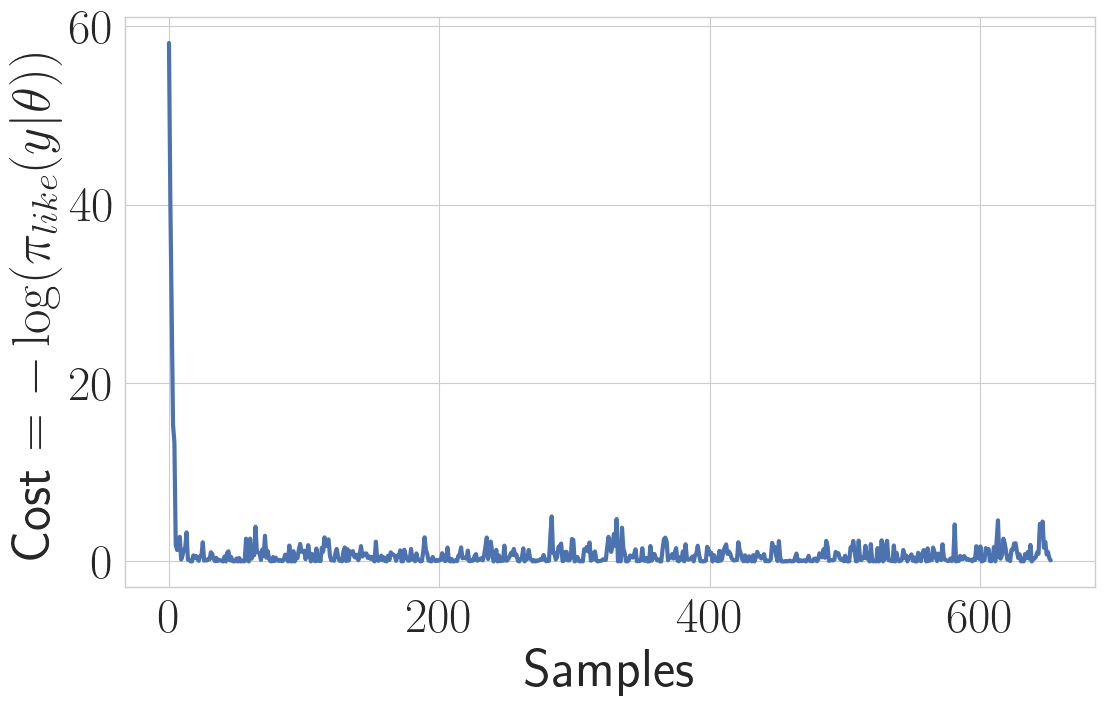

In [15]:
plot(cost_chains[plot_chain], xl=r'Samples', yl= r'Cost = $-\log(\pi_{like}(y | \theta))$', \
     savefig = savefig, savefile = sfpath_chain + 'cost_' + plot_chain + '.pdf', figsize=[12,8])

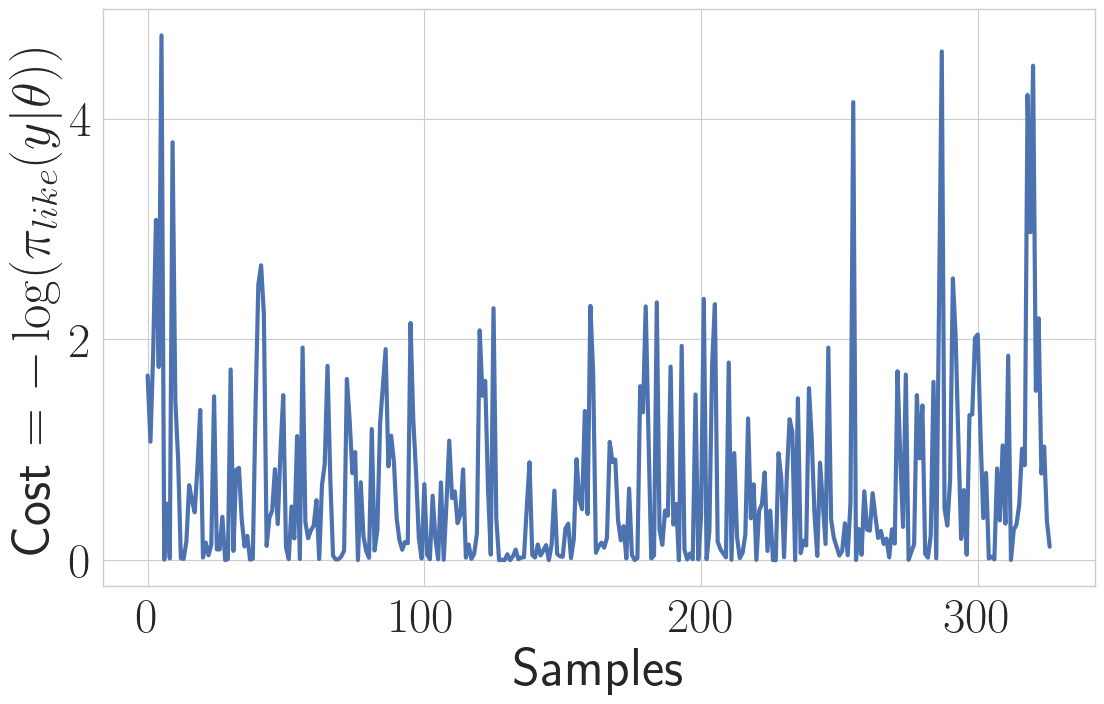

In [16]:
plot(cost_chains_burn[plot_chain], xl=r'Samples', yl= r'Cost = $-\log(\pi_{like}(y | \theta))$', \
     savefig = savefig, savefile = sfpath_chain + 'cost_burn_' + plot_chain + '.pdf', figsize=[12,8])

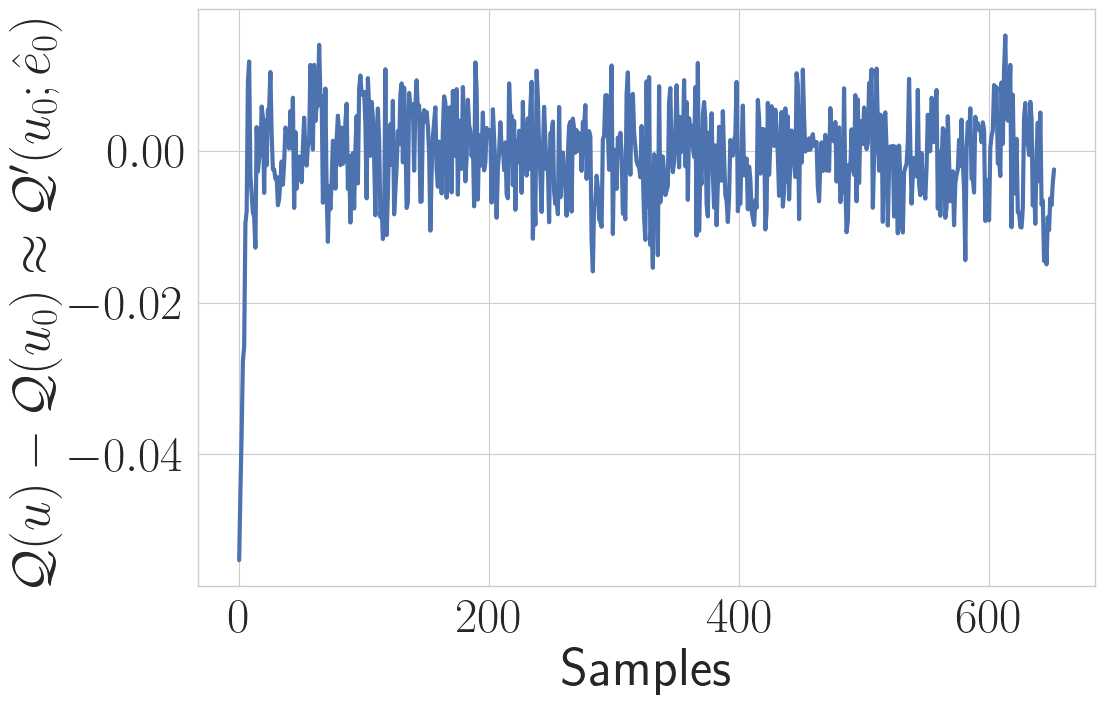

In [17]:
plot(qoi_chains[plot_chain], xl=r'Samples', \
     yl=r"$\mathcal{Q}(u) - \mathcal{Q}(u_0) \approx \mathcal{Q}'(u_0; \hat{e}_0)$", \
     savefig = savefig, savefile = sfpath_chain + 'qoi_{}.pdf'.format(plot_chain), figsize=[12,8])

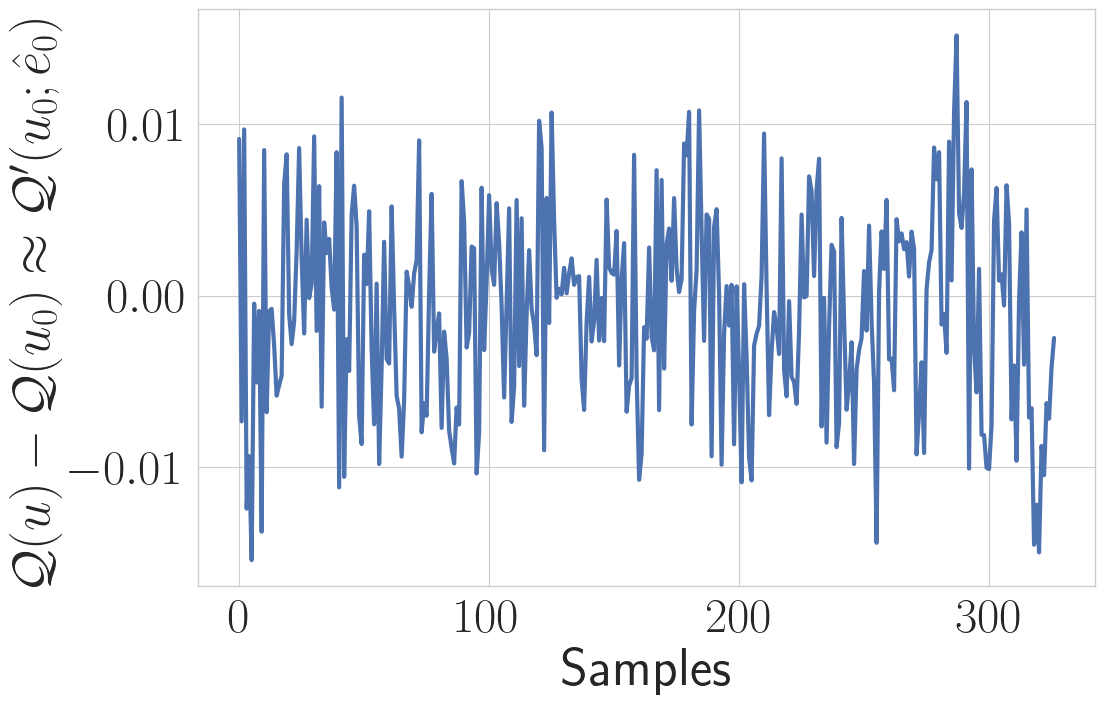

In [18]:
plot(qoi_chains_burn[plot_chain], xl=r'Samples', \
     yl=r"$\mathcal{Q}(u) - \mathcal{Q}(u_0) \approx \mathcal{Q}'(u_0; \hat{e}_0)$", \
     savefig = savefig, savefile = sfpath_chain + 'qoi_burn_{}.pdf'.format(plot_chain), figsize=[12,8])

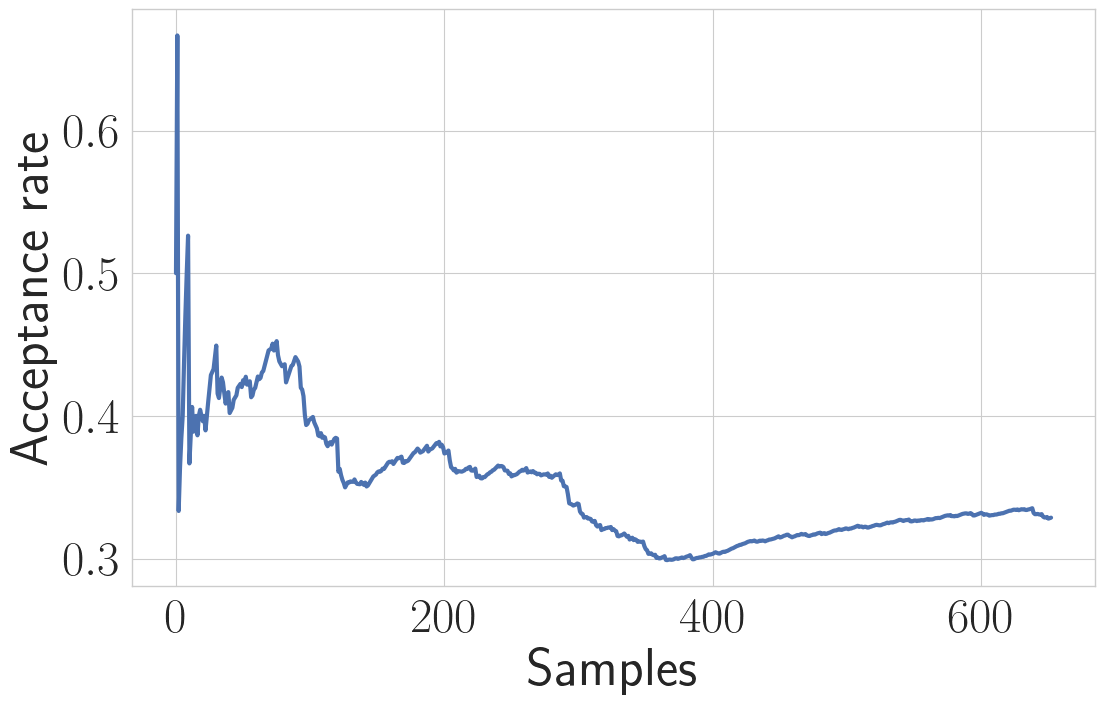

In [19]:
plot(acc_chains[plot_chain], xl = r'Samples', yl= r'Acceptance rate', \
     savefig = savefig, savefile = sfpath_chain + 'acc_{}.pdf'.format(plot_chain), figsize=[12,8])

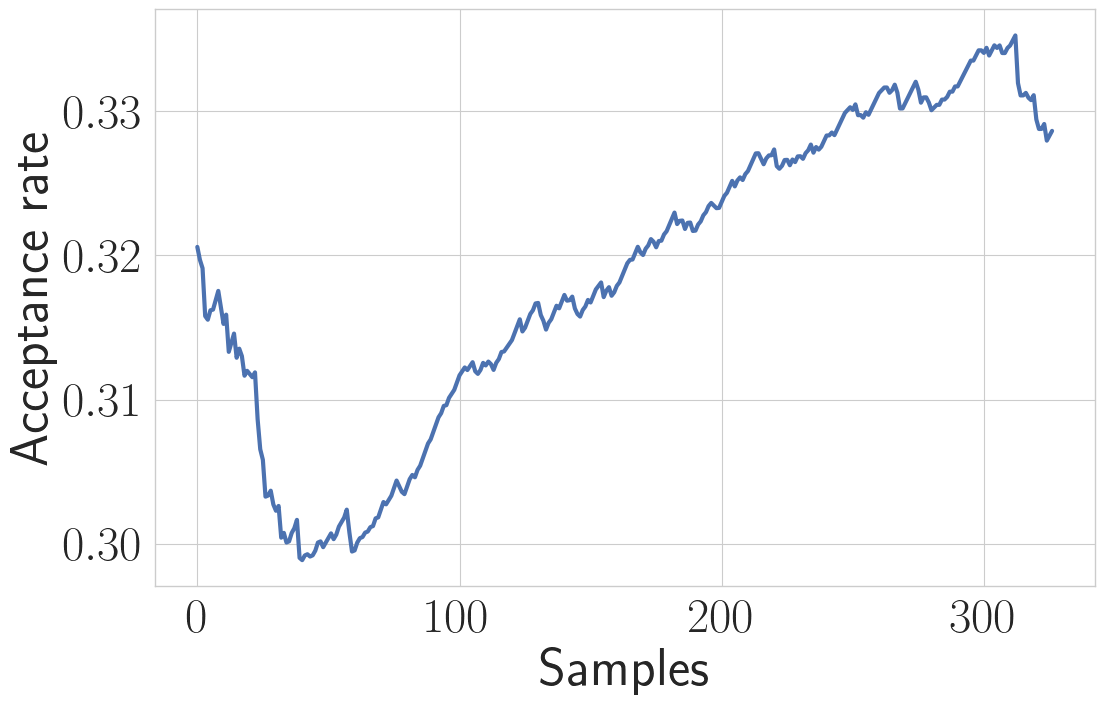

In [20]:
plot(acc_chains_burn[plot_chain], xl = r'Samples', yl= r'Acceptance rate', \
     savefig = savefig, savefile = sfpath_chain + 'acc_burn_{}.pdf'.format(plot_chain), figsize=[12,8])

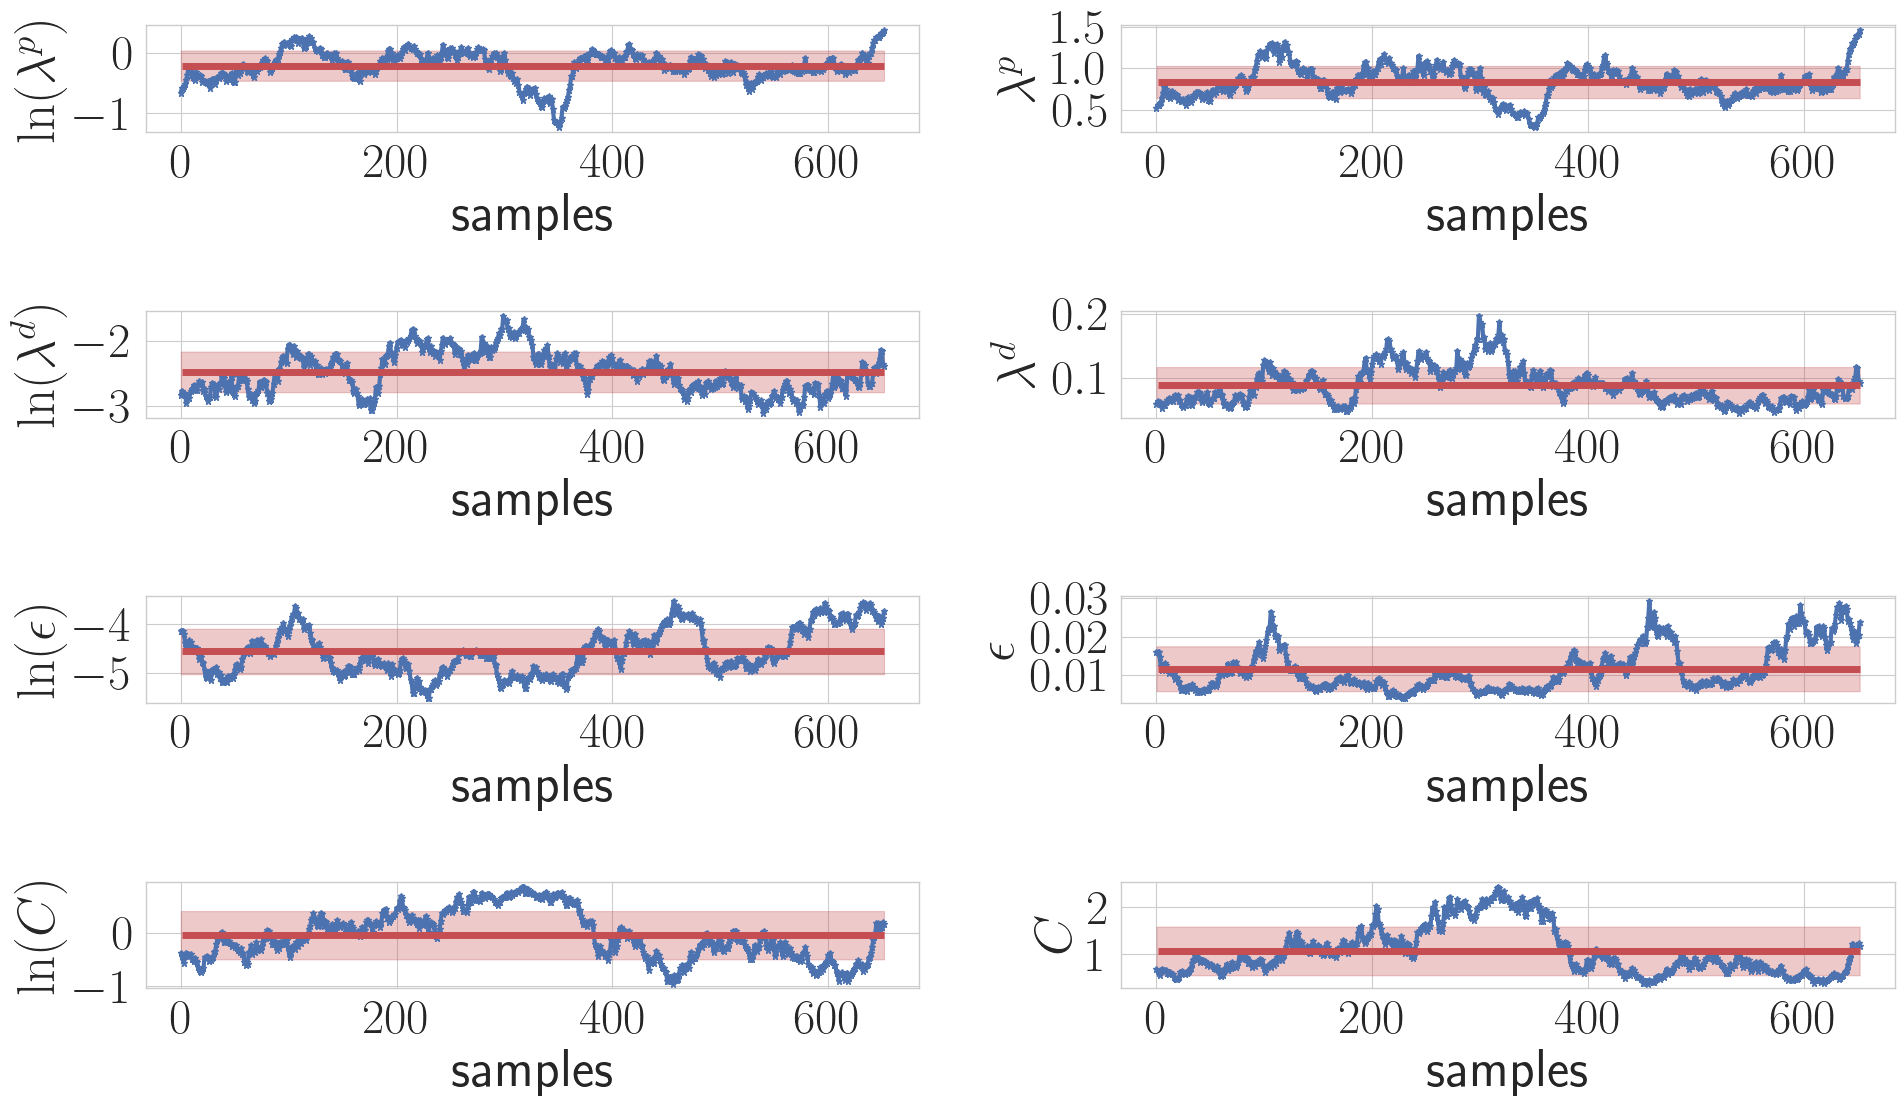

In [21]:
plot_samples = samples_chains[plot_chain]

fig, axs = plt.subplots(nrows=param_dim, ncols=2, figsize=(20, 12))

# get real samples
plot_samples_real = np.exp(plot_samples)

# get mean in ln and real spaces
plot_samples_mean = [np.mean(plot_samples[:, i]) for i in range(param_dim)]
plot_samples_std = [np.std(plot_samples[:, i]) for i in range(param_dim)]

plot_samples_mean_real = [np.mean(plot_samples_real[:, i]) for i in range(param_dim)]
plot_samples_std_real = [np.std(plot_samples_real[:, i]) for i in range(param_dim)]

samples_ids = np.arange(plot_samples.shape[0])
xmin = 1
xmax = samples_ids[-1]
idx = 0
for row in range (param_dim):
    col = 0
    axs[row, col].plot(samples_ids, plot_samples[:, idx], '*-')
    # plot mean line
    axs[row, col].hlines(plot_samples_mean[idx], xmin, xmax, color = 'r', lw = 5)
    
    axs[row, col].fill_between(samples_ids, \
                    plot_samples_mean[idx] - plot_samples_std[idx], \
                    plot_samples_mean[idx] + plot_samples_std[idx], \
                    alpha=0.3, color ='r')
    
    #axs[col].set_title(titles[idx])
    axs[row, col].set_xlabel('samples')
    axs[row, col].set_ylabel(titles[idx])
    
    col = 1
    axs[row, col].plot(samples_ids, plot_samples_real[:, idx], '*-')
    # plot mean line
    axs[row, col].hlines(plot_samples_mean_real[idx], xmin, xmax, color = 'r', lw = 5)
    
    axs[row, col].fill_between(samples_ids, \
                    plot_samples_mean_real[idx] - plot_samples_std_real[idx], \
                    plot_samples_mean_real[idx] + plot_samples_std_real[idx], \
                    alpha=0.3, color ='r')
    
    #axs[col].set_title(titles[idx])
    axs[row, col].set_xlabel('samples')
    axs[row, col].set_ylabel(titles_real[idx])
    
    idx +=1
    

plt.tight_layout()
#plt.xlabel('samples')
if savefig:
    plt.savefig(sfpath_chain + 'samples_{}.pdf'.format(plot_chain))

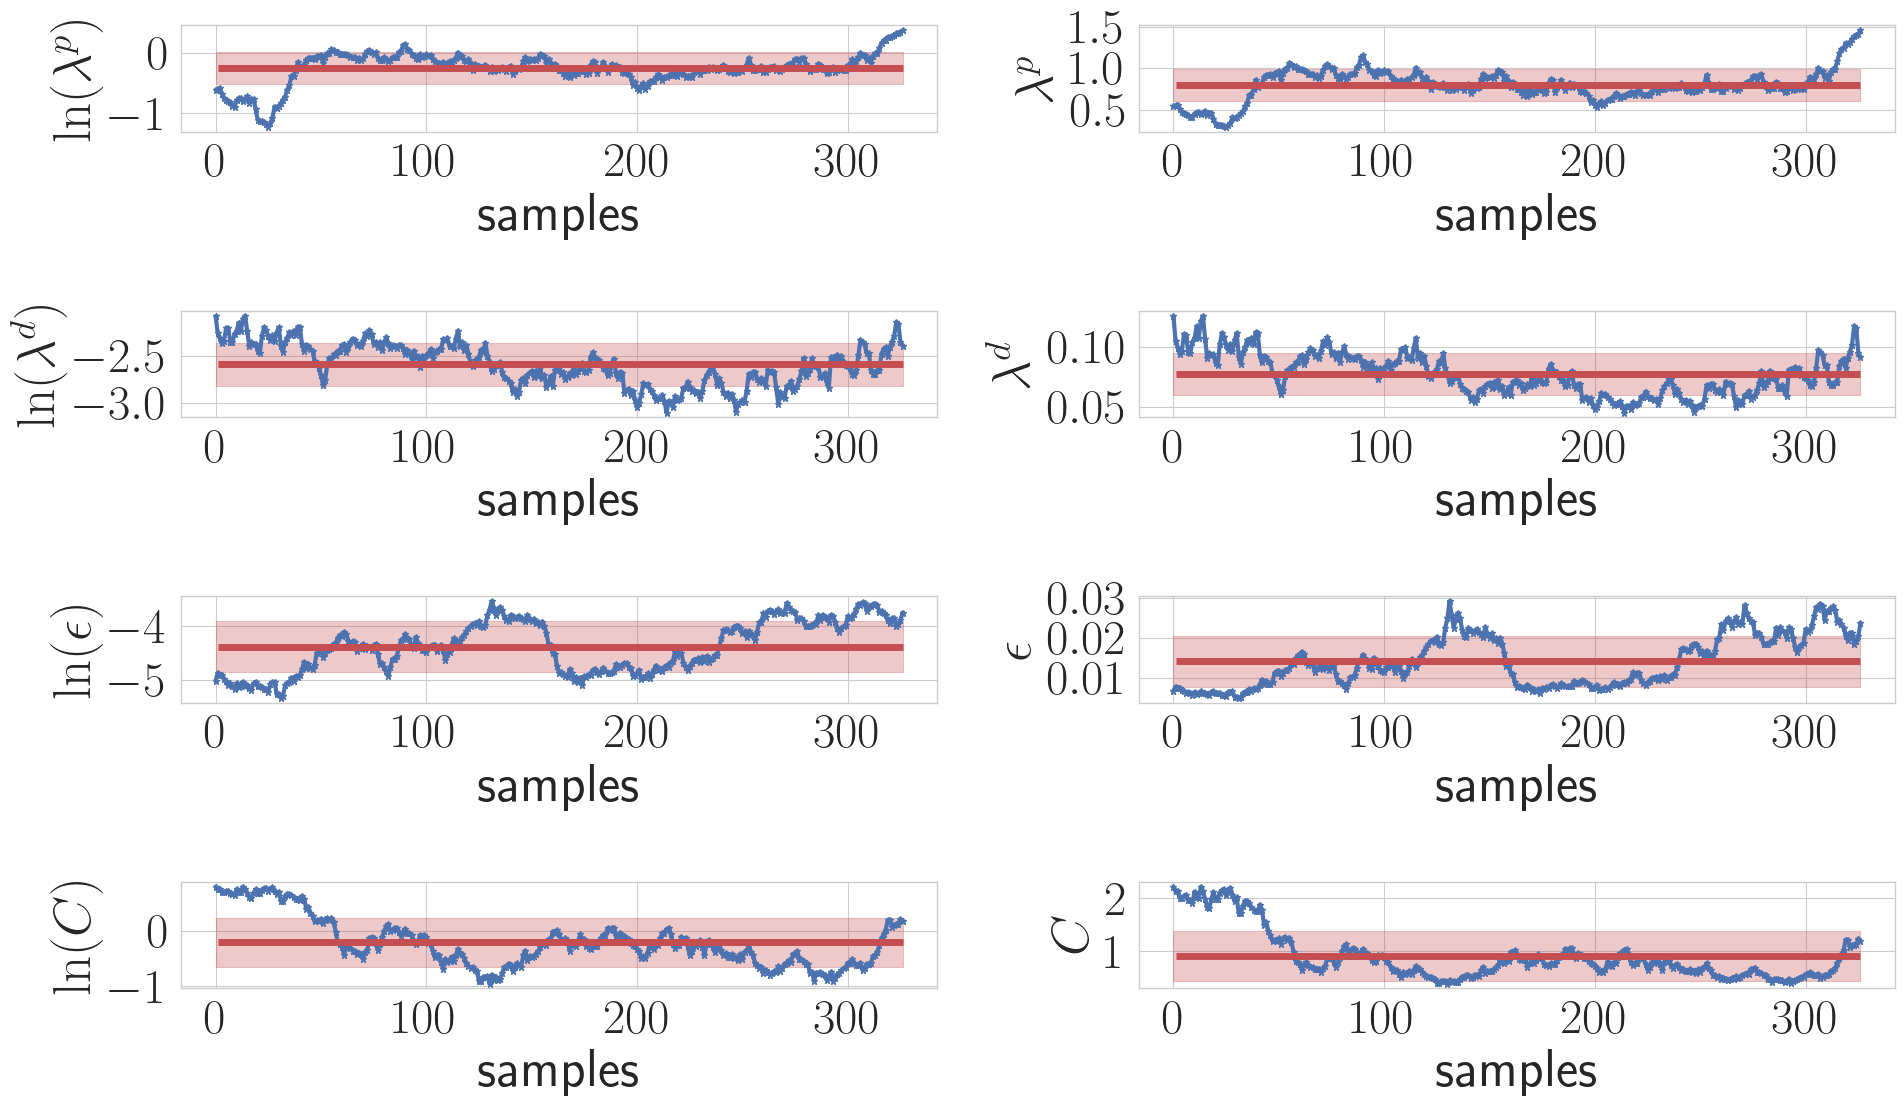

In [22]:
plot_samples = samples_chains_burn[plot_chain]

fig, axs = plt.subplots(nrows=param_dim, ncols=2, figsize=(20, 12))

# get real samples
plot_samples_real = np.exp(plot_samples)

# get mean in ln and real spaces
plot_samples_mean = [np.mean(plot_samples[:, i]) for i in range(param_dim)]
plot_samples_std = [np.std(plot_samples[:, i]) for i in range(param_dim)]

plot_samples_mean_real = [np.mean(plot_samples_real[:, i]) for i in range(param_dim)]
plot_samples_std_real = [np.std(plot_samples_real[:, i]) for i in range(param_dim)]

samples_ids = np.arange(plot_samples.shape[0])
xmin = 1
xmax = samples_ids[-1]
idx = 0
for row in range (param_dim):
    col = 0
    axs[row, col].plot(samples_ids, plot_samples[:, idx], '*-')
    # plot mean line
    axs[row, col].hlines(plot_samples_mean[idx], xmin, xmax, color = 'r', lw = 5)
    
    axs[row, col].fill_between(samples_ids, \
                    plot_samples_mean[idx] - plot_samples_std[idx], \
                    plot_samples_mean[idx] + plot_samples_std[idx], \
                    alpha=0.3, color ='r')
    
    #axs[col].set_title(titles[idx])
    axs[row, col].set_xlabel('samples')
    axs[row, col].set_ylabel(titles[idx])
    
    col = 1
    axs[row, col].plot(samples_ids, plot_samples_real[:, idx], '*-')
    # plot mean line
    axs[row, col].hlines(plot_samples_mean_real[idx], xmin, xmax, color = 'r', lw = 5)
    
    axs[row, col].fill_between(samples_ids, \
                    plot_samples_mean_real[idx] - plot_samples_std_real[idx], \
                    plot_samples_mean_real[idx] + plot_samples_std_real[idx], \
                    alpha=0.3, color ='r')
    
    #axs[col].set_title(titles[idx])
    axs[row, col].set_xlabel('samples')
    axs[row, col].set_ylabel(titles_real[idx])
    
    idx +=1
    

plt.tight_layout()
#plt.xlabel('samples')
if savefig:
    plt.savefig(sfpath_chain + 'samples_burn_{}.pdf'.format(plot_chain))

## Prior and posterior

/tmp/ipykernel_1193912/3941243879.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prior_samples[:, idx], hist=False, ax=cax, \
/tmp/ipykernel_1193912/3941243879.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(plot_samples[:, idx], hist=False, bins = 25, ax=cax,  

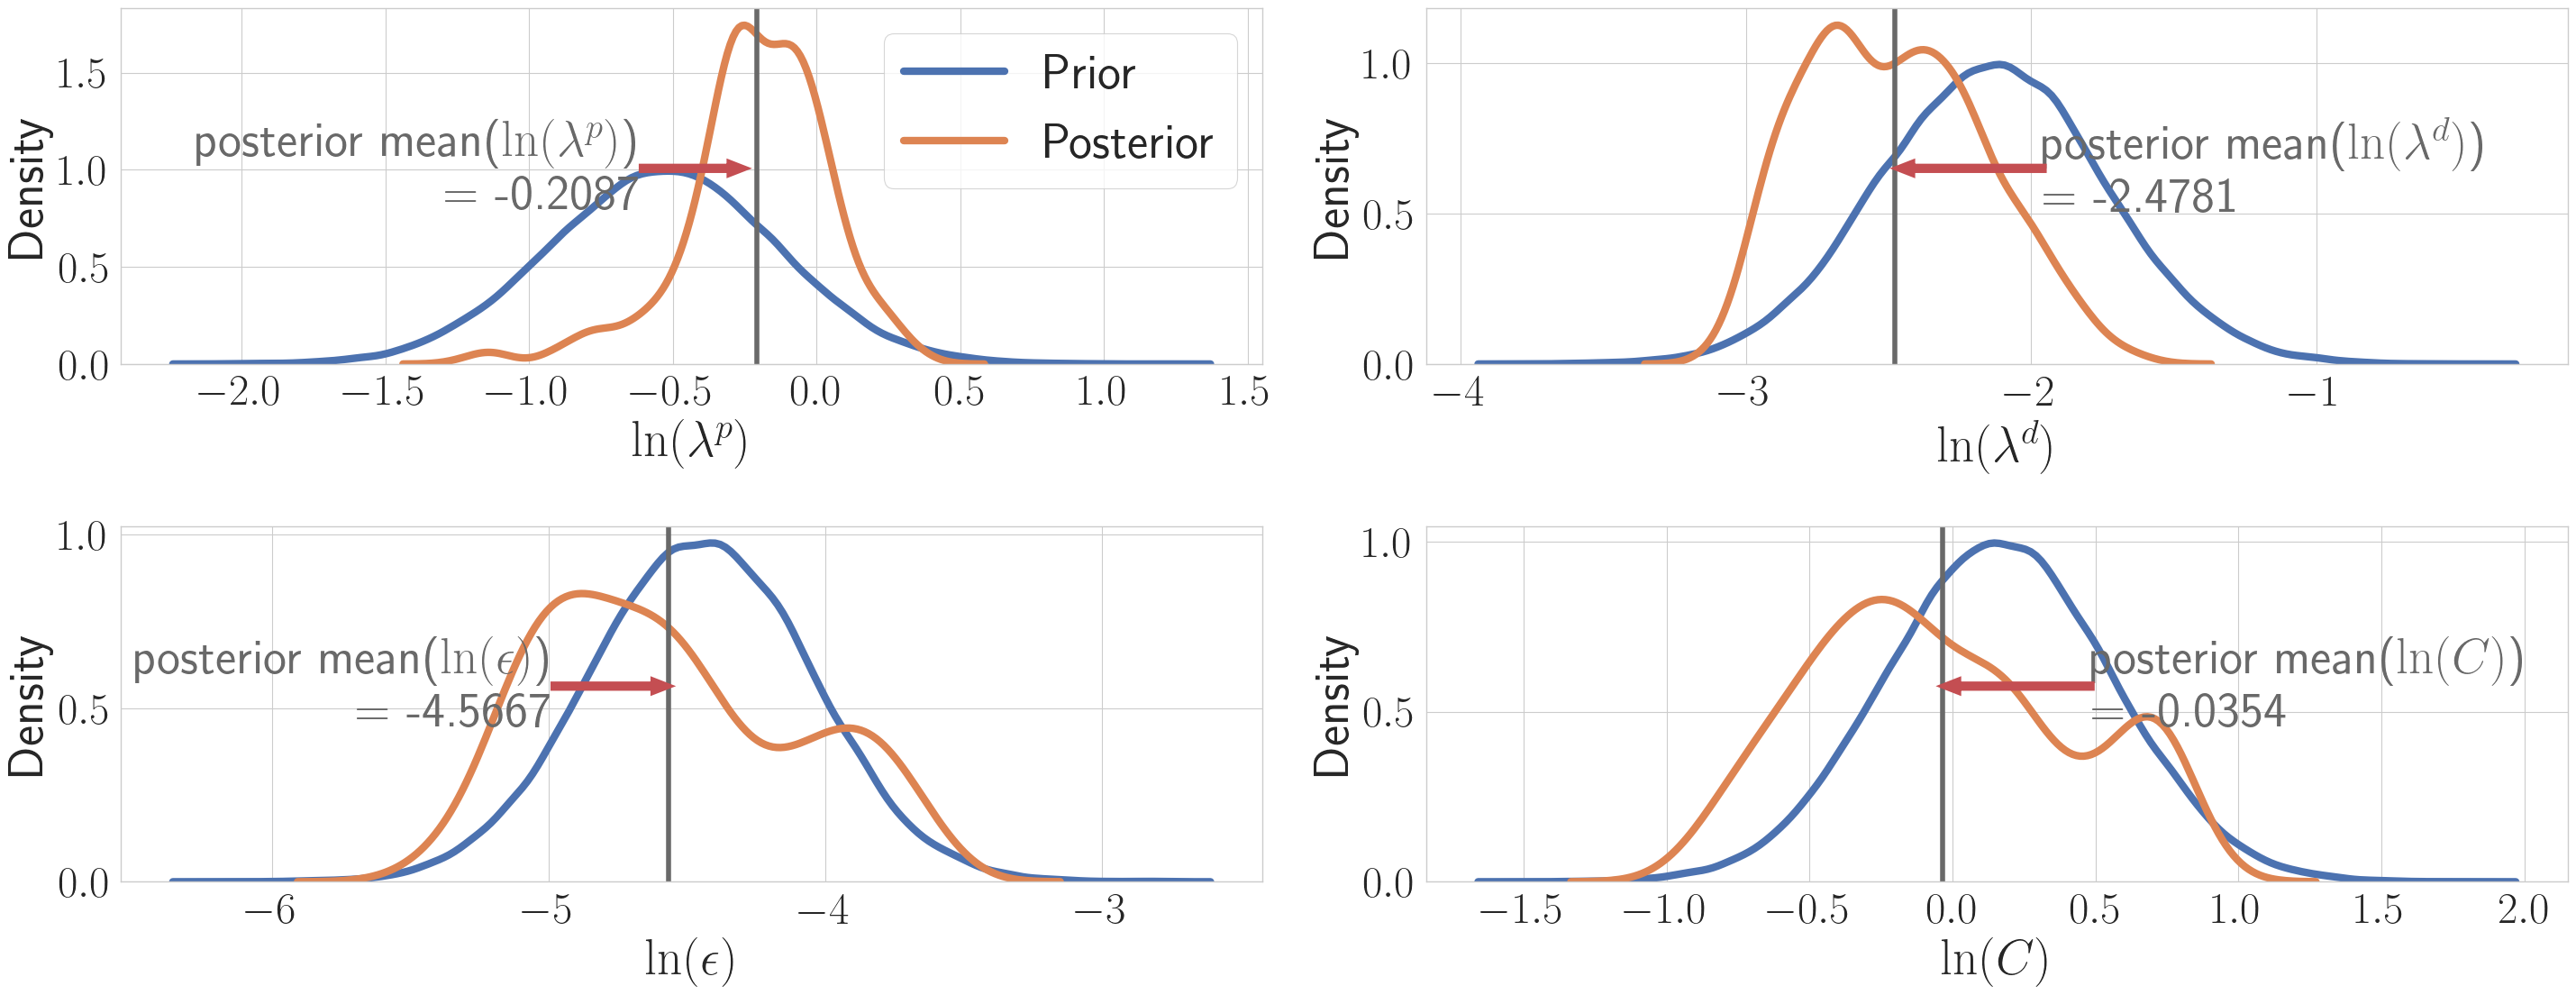

In [23]:
plot_samples = samples_chains[plot_chain]

# get mean 
plot_samples_mean = [np.mean(plot_samples[:, i]) for i in range(param_dim)]
plot_samples_std = [np.std(plot_samples[:, i]) for i in range(param_dim)]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (30, 12))
lw = 6
lw_sm = 4
fs = 40

idx = 0
for plot_i in range(param_dim):
    row = 0 if plot_i < 2 else 1
    col = plot_i if plot_i < 2 else plot_i - 2
    
    cax = axs[row, col]
    # prior
    sns.distplot(prior_samples[:, idx], hist=False, ax=cax, \
                 label='Prior', \
                 kde_kws={"lw": lw})
    # posterior
    ax = sns.distplot(plot_samples[:, idx], hist=False, bins = 25, ax=cax,  \
                 label='Posterior', \
                 kde_kws={"lw": lw})
    
    xlims = ax.get_xlim()
    ylims = ax.get_ylim()
    dx_lims = xlims[1] - xlims[0]
    dy_lims = ylims[1] - ylims[0]
    
    vline_x = plot_samples_mean[idx]
    
    text_y = 0.55 * (ylims[0] + ylims[1])
    text_x = vline_x + 0.13 * dx_lims
    text_ha_align = 'left'
    
    arrow_width = 0.005 * dy_lims
    arrow_head_width = 5 * arrow_width
    arrow_head_length = 0.01 * dx_lims
    
    arrow_dx = vline_x - text_x + 10 * arrow_width
    
    if xlims[1] - text_x < 0.4 * dx_lims:
        text_x = vline_x - 0.1 * dx_lims
        text_ha_align = 'right'
        arrow_dx = vline_x - text_x - 10 * arrow_width
    

    cax.axvline(x=vline_x, color='dimgray', lw = lw_sm)
    cax.text(text_x, text_y, \
                       r'posterior mean(' + titles[idx] + r')' + '\n' + r'= ' + '%6.4f' % (vline_x), \
                       color = 'dimgray', va = 'center', ha = text_ha_align, fontsize = fs, zorder=10)
    
    
    cax.arrow(text_x, text_y, dx = arrow_dx, dy = 0, \
                   color = 'r', lw = lw, \
                   width = arrow_width, \
                   head_width = arrow_head_width, head_length = arrow_head_length, zorder=10)
    
        
    cax.set_xlabel(titles[idx], fontsize = fs)
    cax.set_ylabel(r"Density", fontsize = fs)
    if col == 0 and row == 0:
        cax.legend(fancybox=True, fontsize = fs, loc = 'upper right')
    idx += 1
    
fig.tight_layout()
if savefig:
    plt.savefig(sfpath_chain + 'prior_vs_posterior_validation.pdf')

/tmp/ipykernel_1193912/1194680601.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prior_samples[:, idx], hist=False, ax=cax, \
/tmp/ipykernel_1193912/1194680601.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(plot_samples[:, idx], hist=False, bins = 25, ax=cax,  

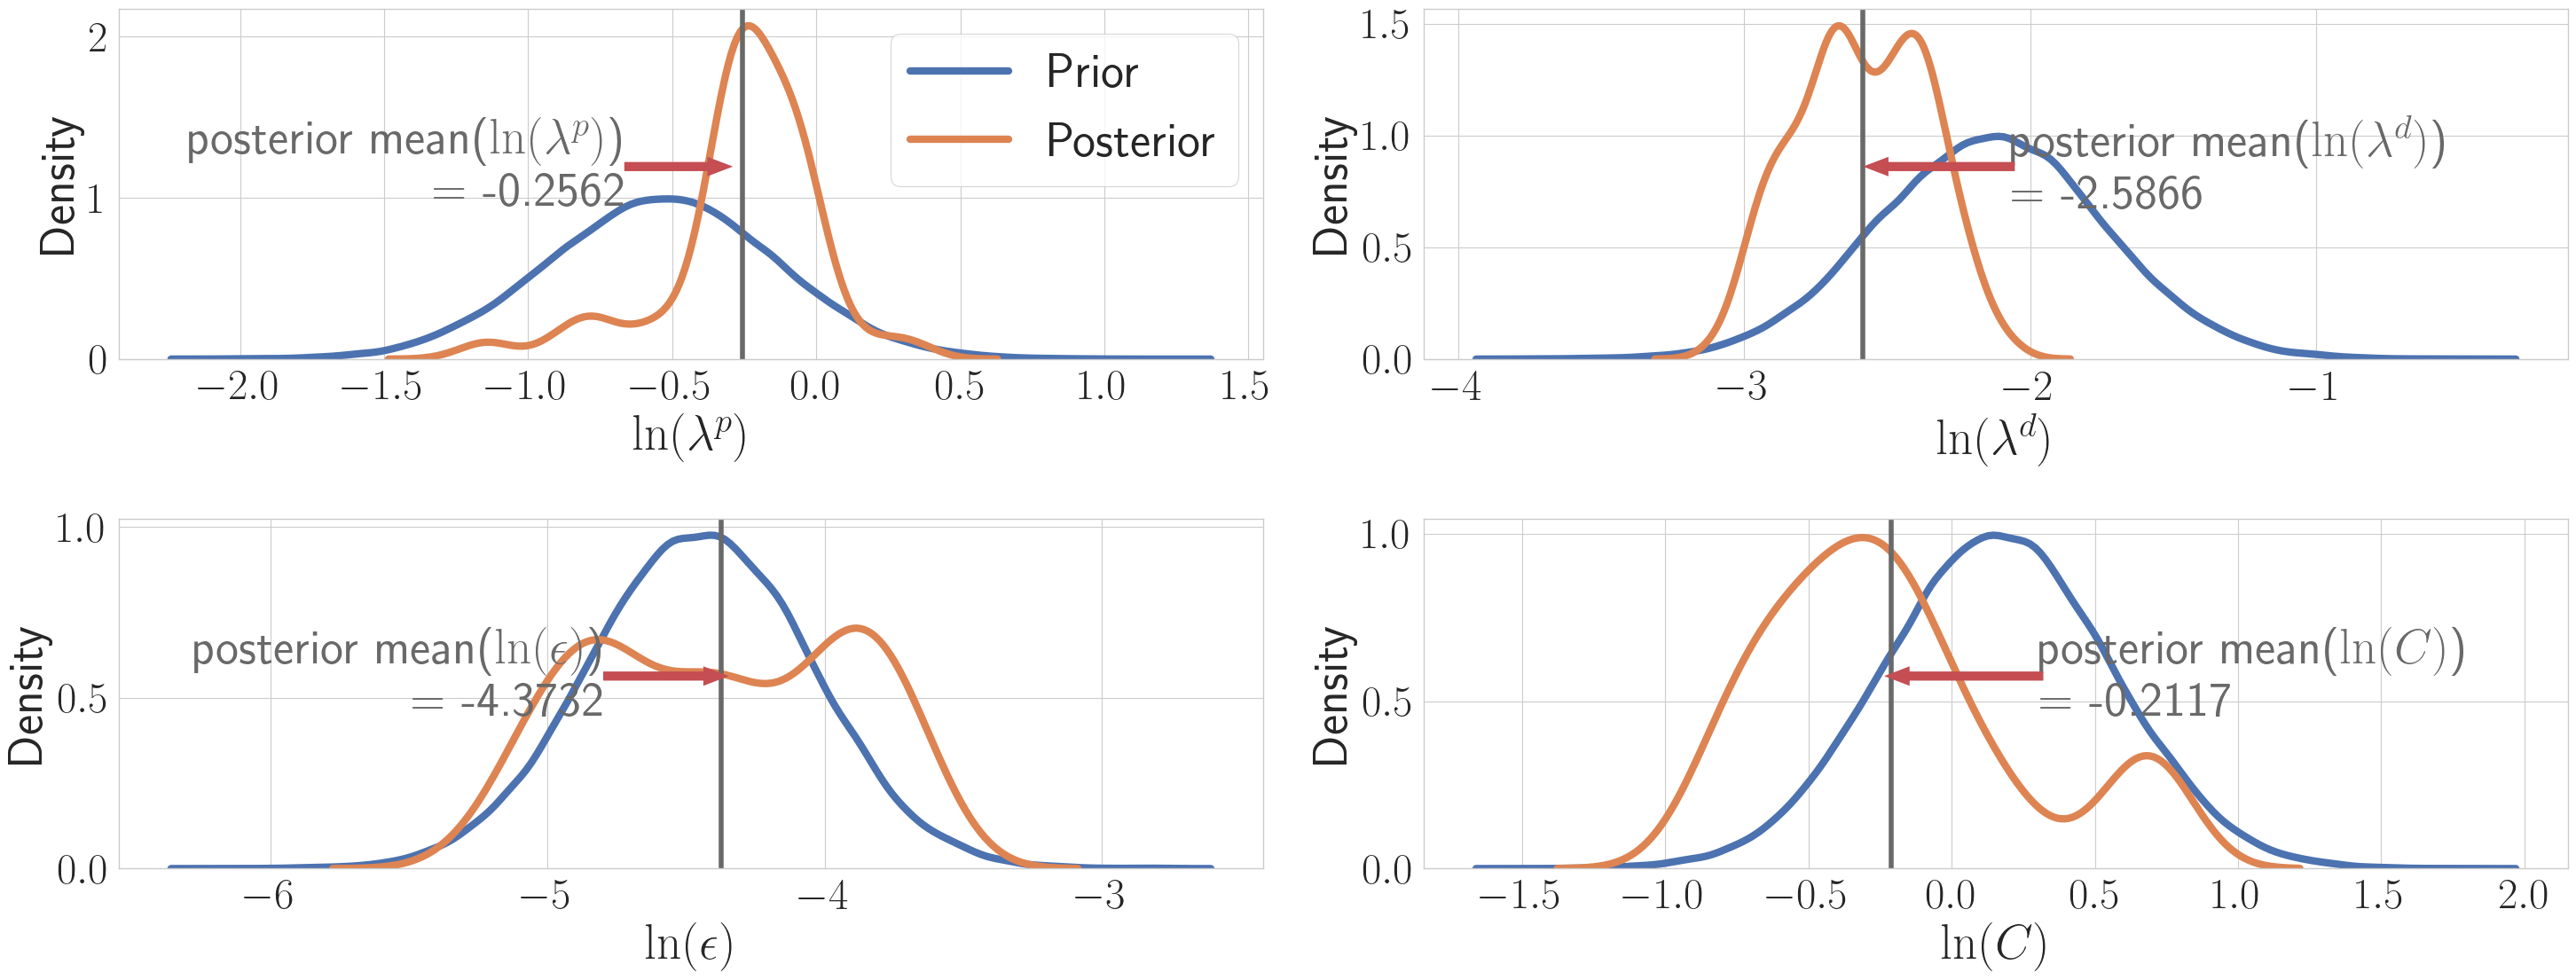

In [24]:
plot_samples = samples_chains_burn[plot_chain]

# get mean 
plot_samples_mean = [np.mean(plot_samples[:, i]) for i in range(param_dim)]
plot_samples_std = [np.std(plot_samples[:, i]) for i in range(param_dim)]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (30, 12))
lw = 6
lw_sm = 4
fs = 40

idx = 0
for plot_i in range(param_dim):
    row = 0 if plot_i < 2 else 1
    col = plot_i if plot_i < 2 else plot_i - 2
    
    cax = axs[row, col]
    # prior
    sns.distplot(prior_samples[:, idx], hist=False, ax=cax, \
                 label='Prior', \
                 kde_kws={"lw": lw})
    # posterior
    ax = sns.distplot(plot_samples[:, idx], hist=False, bins = 25, ax=cax,  \
                 label='Posterior', \
                 kde_kws={"lw": lw})
    
    xlims = ax.get_xlim()
    ylims = ax.get_ylim()
    dx_lims = xlims[1] - xlims[0]
    dy_lims = ylims[1] - ylims[0]
    
    vline_x = plot_samples_mean[idx]
    
    text_y = 0.55 * (ylims[0] + ylims[1])
    text_x = vline_x + 0.13 * dx_lims
    text_ha_align = 'left'
    
    arrow_width = 0.005 * dy_lims
    arrow_head_width = 5 * arrow_width
    arrow_head_length = 0.01 * dx_lims
    
    arrow_dx = vline_x - text_x + 10 * arrow_width
    
    if xlims[1] - text_x < 0.4 * dx_lims:
        text_x = vline_x - 0.1 * dx_lims
        text_ha_align = 'right'
        arrow_dx = vline_x - text_x - 10 * arrow_width
    

    cax.axvline(x=vline_x, color='dimgray', lw = lw_sm)
    cax.text(text_x, text_y, \
                       r'posterior mean(' + titles[idx] + r')' + '\n' + r'= ' + '%6.4f' % (vline_x), \
                       color = 'dimgray', va = 'center', ha = text_ha_align, fontsize = fs, zorder=10)
    
    
    cax.arrow(text_x, text_y, dx = arrow_dx, dy = 0, \
                   color = 'r', lw = lw, \
                   width = arrow_width, \
                   head_width = arrow_head_width, head_length = arrow_head_length, zorder=10)
    
        
    cax.set_xlabel(titles[idx], fontsize = fs)
    cax.set_ylabel(r"Density", fontsize = fs)
    if col == 0 and row == 0:
        cax.legend(fancybox=True, fontsize = fs, loc = 'upper right')
    idx += 1
    
fig.tight_layout()
if savefig:
    plt.savefig(sfpath_chain + 'prior_vs_posterior_validation_burn.pdf')

/tmp/ipykernel_1193912/2061816052.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.exp(prior_samples[:, idx]), hist=False, ax=cax, \
/tmp/ipykernel_1193912/2061816052.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(plot_samples[:, idx], hist=False, bins = 25, a

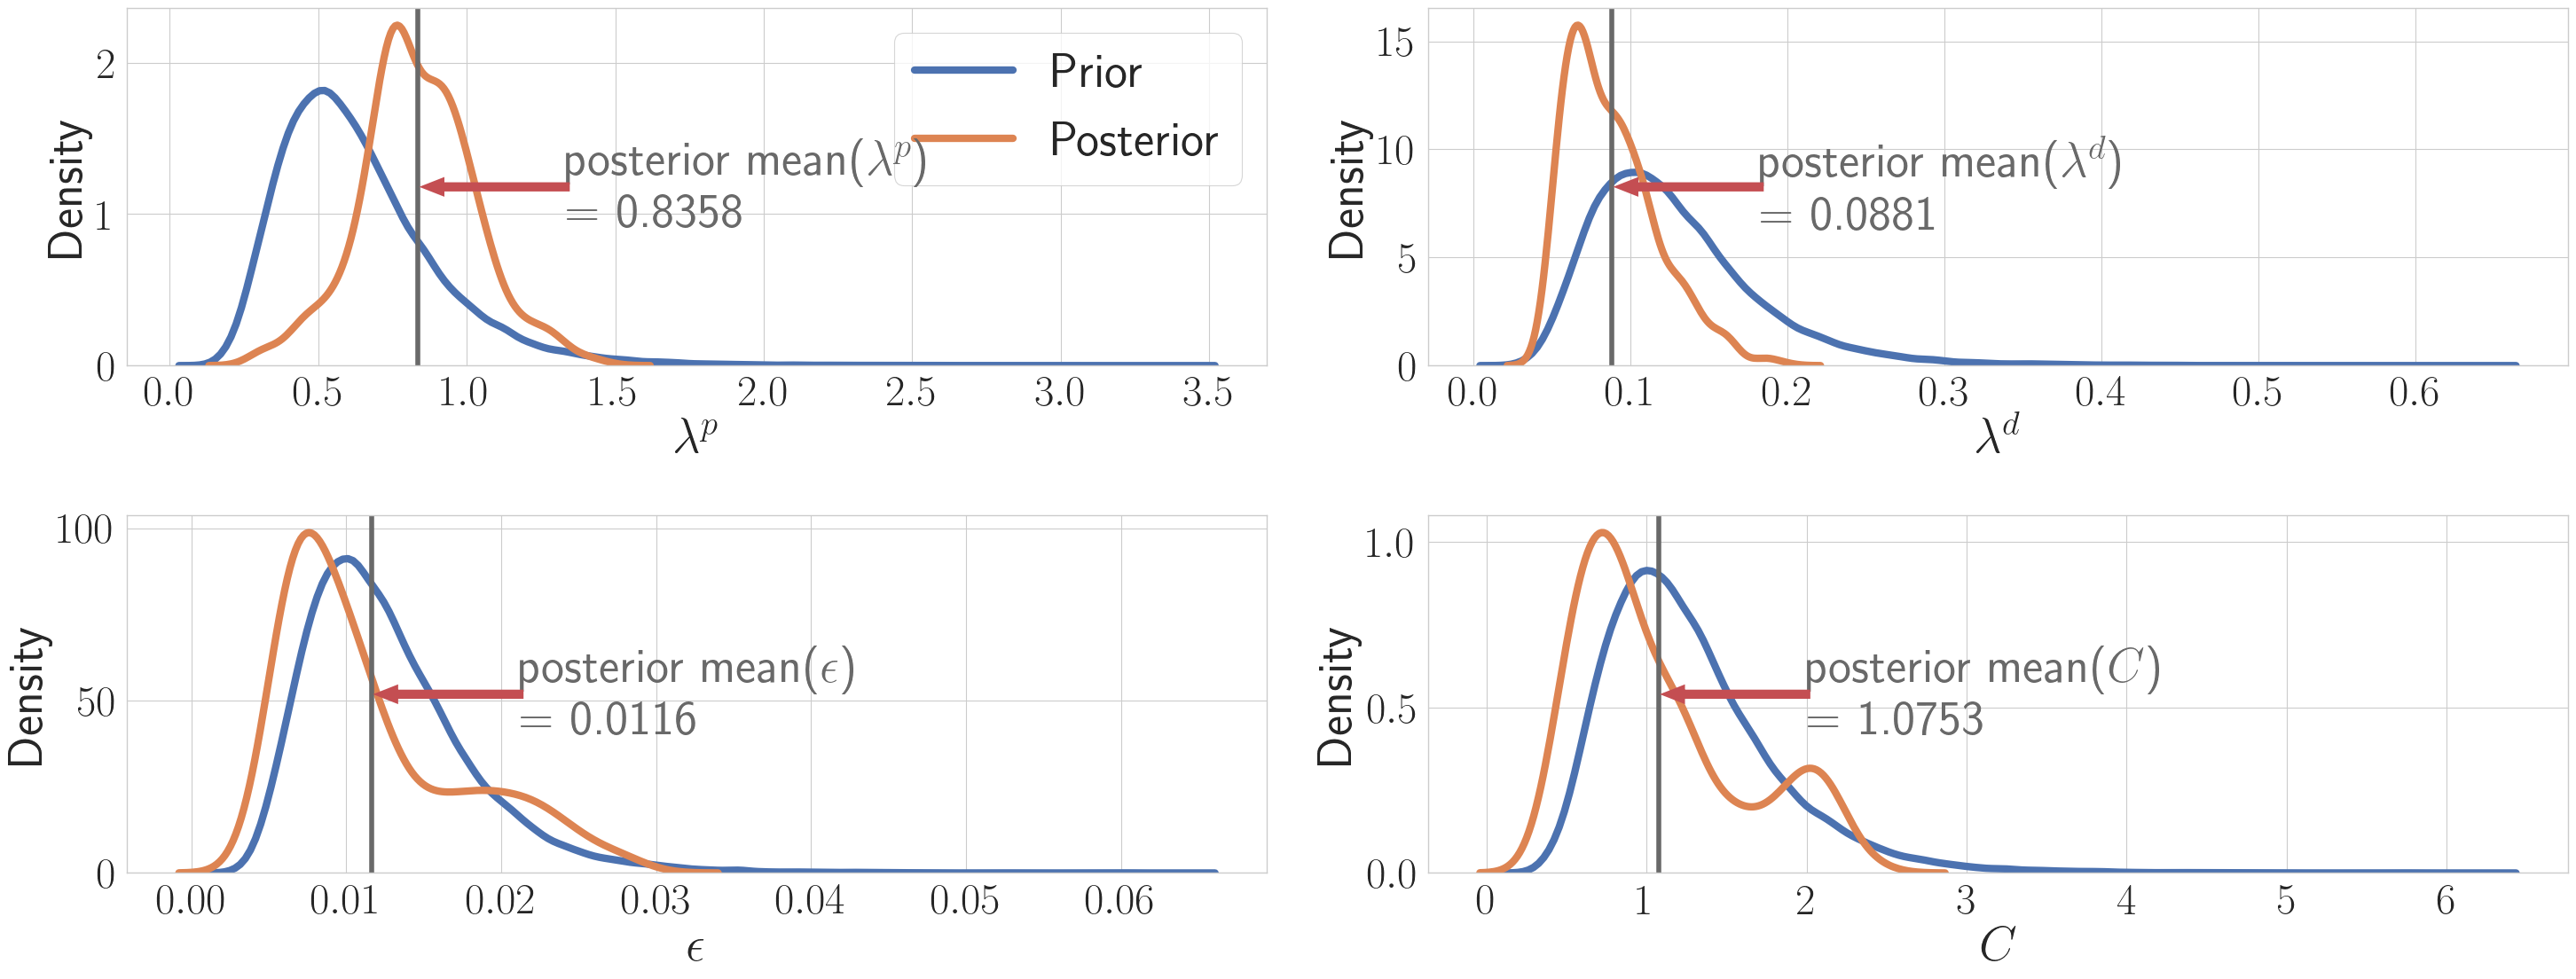

In [25]:
plot_samples = np.exp(samples_chains[plot_chain])

# get mean 
plot_samples_mean = [np.mean(plot_samples[:, i]) for i in range(param_dim)]
plot_samples_std = [np.std(plot_samples[:, i]) for i in range(param_dim)]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (30, 12))
lw = 6
lw_sm = 4
fs = 40

idx = 0
for plot_i in range(param_dim):
    row = 0 if plot_i < 2 else 1
    col = plot_i if plot_i < 2 else plot_i - 2
    
    cax = axs[row, col]
    # prior
    sns.distplot(np.exp(prior_samples[:, idx]), hist=False, ax=cax, \
                 label='Prior', \
                 kde_kws={"lw": lw})
    # posterior
    ax = sns.distplot(plot_samples[:, idx], hist=False, bins = 25, ax=cax,  \
                 label='Posterior', \
                 kde_kws={"lw": lw})
    
    xlims = cax.get_xlim()
    ylims = cax.get_ylim()
    dx_lims = xlims[1] - xlims[0]
    dy_lims = ylims[1] - ylims[0]
    
    vline_x = plot_samples_mean[idx]
    
    text_y = ylims[0] + 0.5 * (ylims[1] - ylims[0])
    text_x = vline_x + 0.13 * dx_lims
    text_ha_align = 'left'
    
    arrow_width = 0.005 * dy_lims
    arrow_head_width = 5 * arrow_width
    arrow_head_length = 0.01 * dx_lims
    
    arrow_dx = vline_x - text_x + 0.02 * dx_lims
    
    #if xlims[1] - text_x < 0.4 * dx_lims:
    #    text_x = vline_x - 0.1 * dx_lims
    #    text_ha_align = 'right'
    #    arrow_dx = vline_x - text_x - 10 * arrow_width
    

    cax.axvline(x=vline_x, color='dimgray', lw = lw_sm)
    cax.text(text_x, text_y, \
                       r'posterior mean(' + titles_real[idx] + r')' + '\n' + r'= ' + '%6.4f' % (vline_x), \
                       color = 'dimgray', va = 'center', ha = text_ha_align, fontsize = fs, zorder=10)
    
    
    cax.arrow(text_x, text_y, dx = arrow_dx, dy = 0, \
                   color = 'r', lw = lw, \
                   width = arrow_width, \
                   head_width = arrow_head_width, head_length = arrow_head_length, zorder=10)
    
        
    cax.set_xlabel(titles_real[idx], fontsize = fs)
    cax.set_ylabel(r"Density", fontsize = fs)
    if col == 0 and row == 0:
        cax.legend(fancybox=True, fontsize = fs, loc = 'upper right')
    idx += 1
    
fig.tight_layout()
if savefig:
    plt.savefig(sfpath_chain + 'prior_vs_posterior_real_validation.pdf')

/tmp/ipykernel_1193912/4072943357.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.exp(prior_samples[:, idx]), hist=False, ax=cax, \
/tmp/ipykernel_1193912/4072943357.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(plot_samples[:, idx], hist=False, bins = 25, a

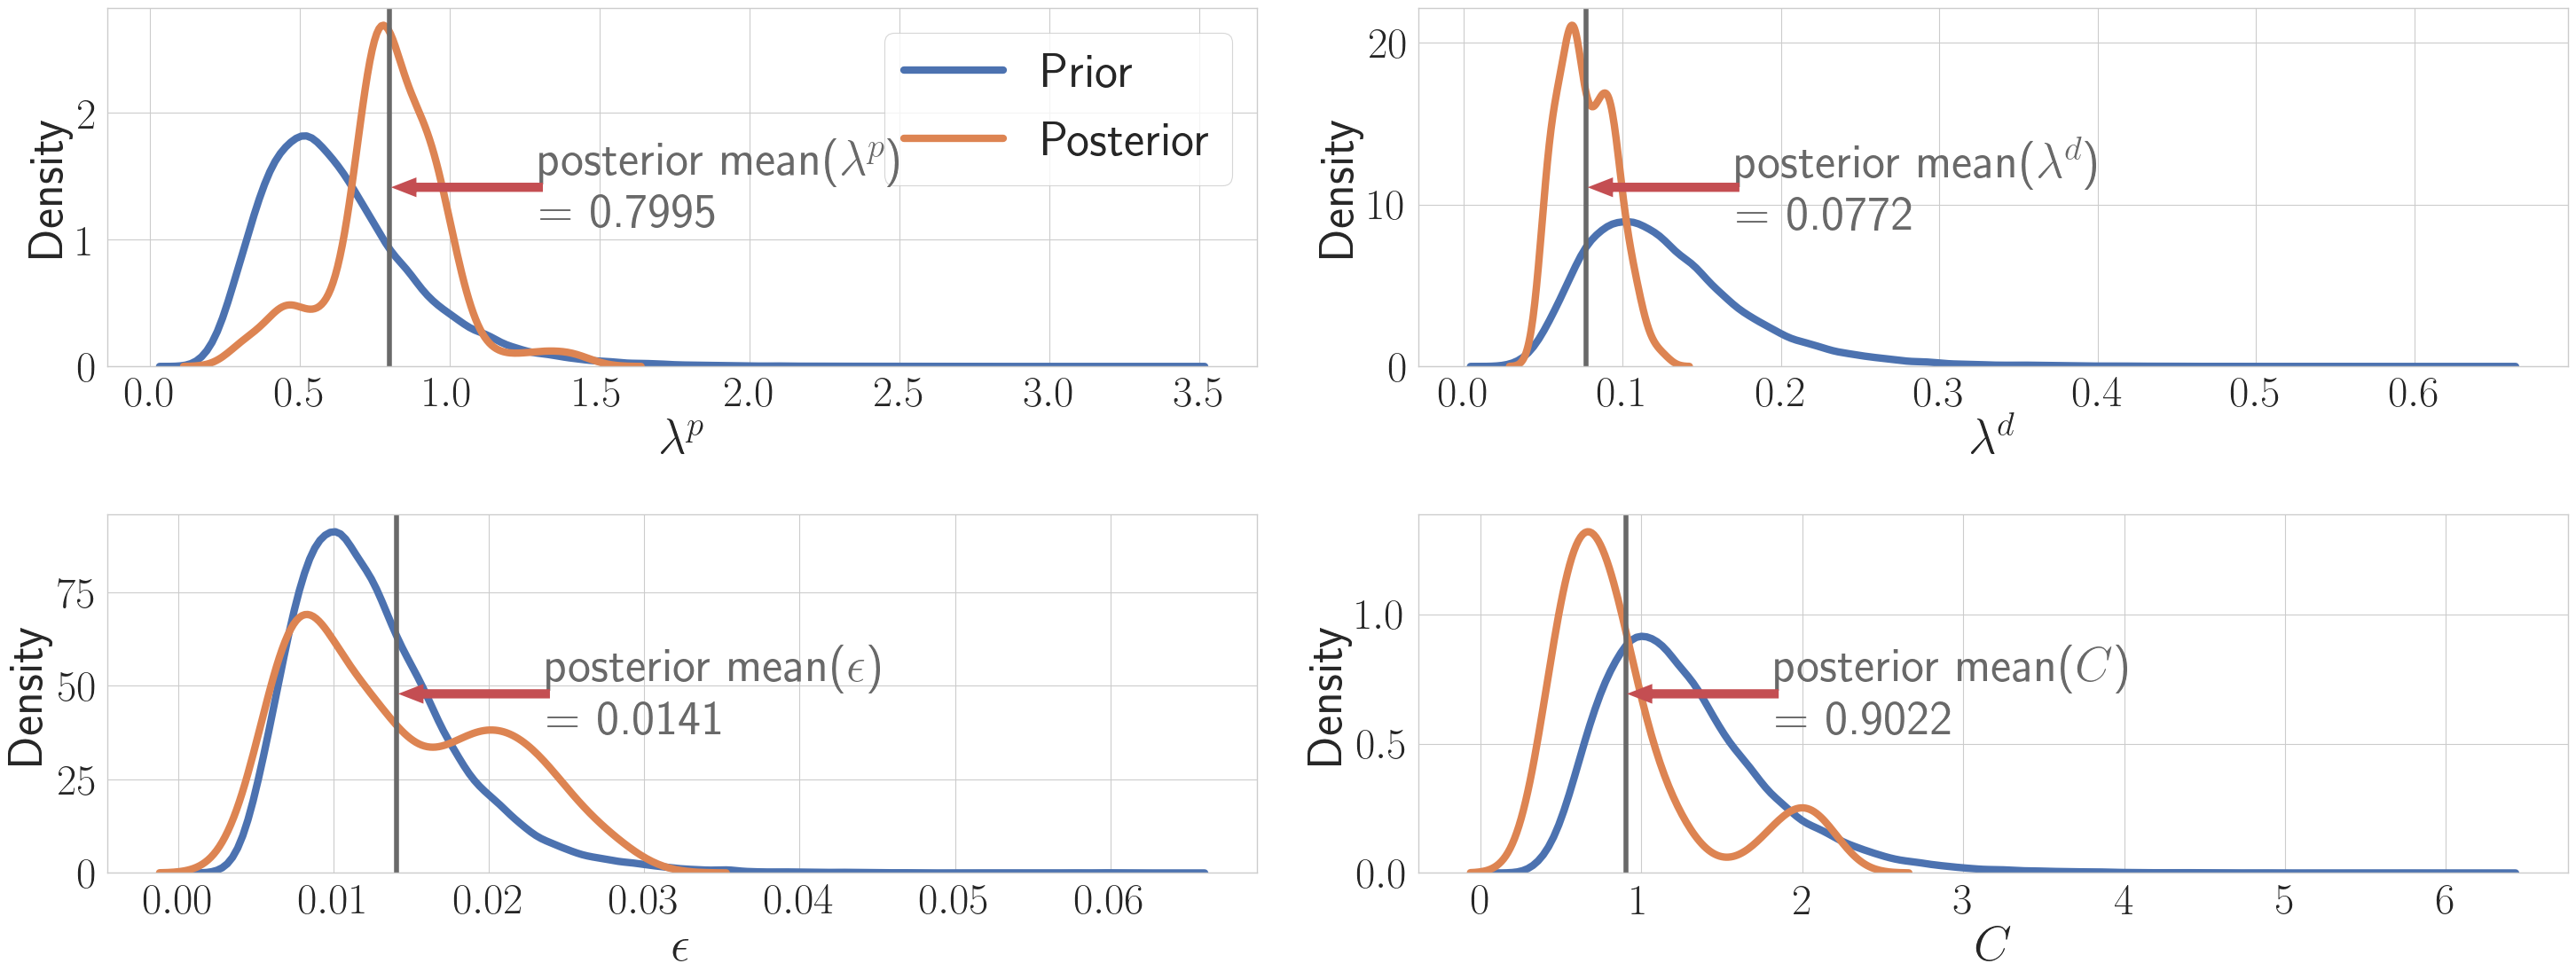

In [26]:
plot_samples = np.exp(samples_chains_burn[plot_chain])

# get mean 
plot_samples_mean = [np.mean(plot_samples[:, i]) for i in range(param_dim)]
plot_samples_std = [np.std(plot_samples[:, i]) for i in range(param_dim)]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (30, 12))
lw = 6
lw_sm = 4
fs = 40

idx = 0
for plot_i in range(param_dim):
    row = 0 if plot_i < 2 else 1
    col = plot_i if plot_i < 2 else plot_i - 2
    
    cax = axs[row, col]
    # prior
    sns.distplot(np.exp(prior_samples[:, idx]), hist=False, ax=cax, \
                 label='Prior', \
                 kde_kws={"lw": lw})
    # posterior
    ax = sns.distplot(plot_samples[:, idx], hist=False, bins = 25, ax=cax,  \
                 label='Posterior', \
                 kde_kws={"lw": lw})
    
    xlims = cax.get_xlim()
    ylims = cax.get_ylim()
    dx_lims = xlims[1] - xlims[0]
    dy_lims = ylims[1] - ylims[0]
    
    vline_x = plot_samples_mean[idx]
    
    text_y = ylims[0] + 0.5 * (ylims[1] - ylims[0])
    text_x = vline_x + 0.13 * dx_lims
    text_ha_align = 'left'
    
    arrow_width = 0.005 * dy_lims
    arrow_head_width = 5 * arrow_width
    arrow_head_length = 0.01 * dx_lims
    
    arrow_dx = vline_x - text_x + 0.02 * dx_lims
    
    #if xlims[1] - text_x < 0.4 * dx_lims:
    #    text_x = vline_x - 0.1 * dx_lims
    #    text_ha_align = 'right'
    #    arrow_dx = vline_x - text_x - 10 * arrow_width
    

    cax.axvline(x=vline_x, color='dimgray', lw = lw_sm)
    cax.text(text_x, text_y, \
                       r'posterior mean(' + titles_real[idx] + r')' + '\n' + r'= ' + '%6.4f' % (vline_x), \
                       color = 'dimgray', va = 'center', ha = text_ha_align, fontsize = fs, zorder=10)
    
    
    cax.arrow(text_x, text_y, dx = arrow_dx, dy = 0, \
                   color = 'r', lw = lw, \
                   width = arrow_width, \
                   head_width = arrow_head_width, head_length = arrow_head_length, zorder=10)
    
        
    cax.set_xlabel(titles_real[idx], fontsize = fs)
    cax.set_ylabel(r"Density", fontsize = fs)
    if col == 0 and row == 0:
        cax.legend(fancybox=True, fontsize = fs, loc = 'upper right')
    idx += 1
    
fig.tight_layout()
if savefig:
    plt.savefig(sfpath_chain + 'prior_vs_posterior_real_validation_burn.pdf')

# Plot combined chain

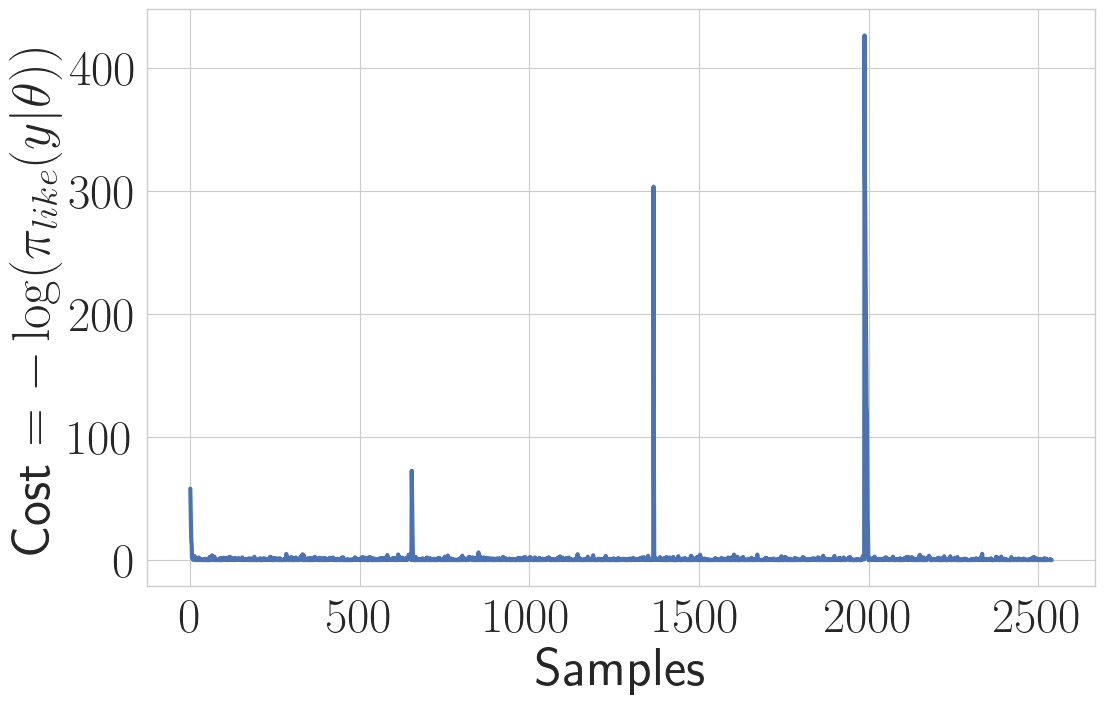

In [27]:
plot(cost, xl=r'Samples', yl= r'Cost = $-\log(\pi_{like}(y | \theta))$', \
     savefig = savefig, savefile = sfpath + 'cost.pdf', figsize=[12,8])

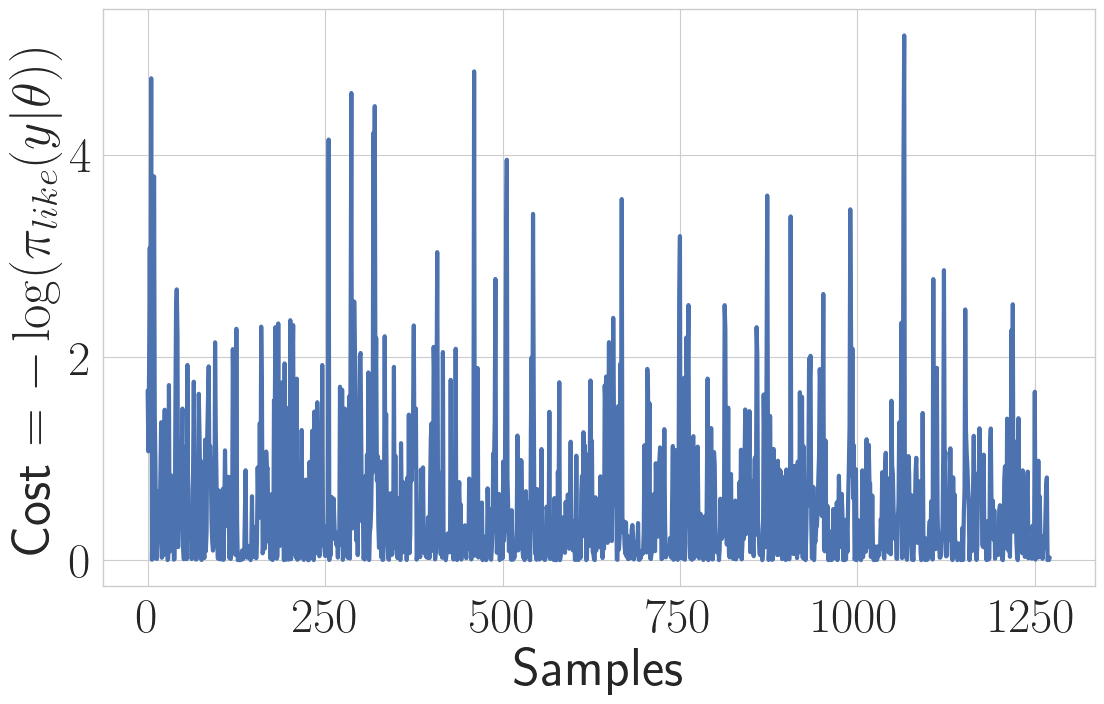

In [28]:
plot(cost_burn, xl=r'Samples', yl= r'Cost = $-\log(\pi_{like}(y | \theta))$', \
     savefig = savefig, savefile = sfpath + 'cost_burn.pdf', figsize=[12,8])

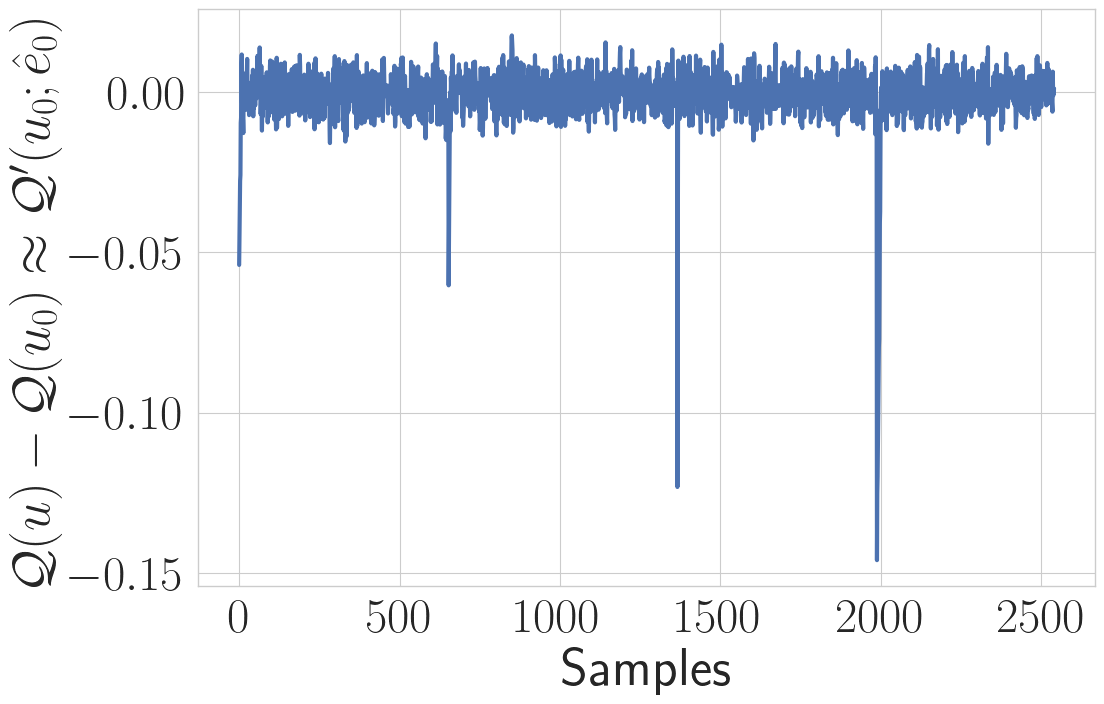

In [29]:
plot(qoi, xl=r'Samples', \
     yl=r"$\mathcal{Q}(u) - \mathcal{Q}(u_0) \approx \mathcal{Q}'(u_0; \hat{e}_0)$", \
     savefig = savefig, savefile = sfpath + 'qoi.pdf', figsize=[12,8])

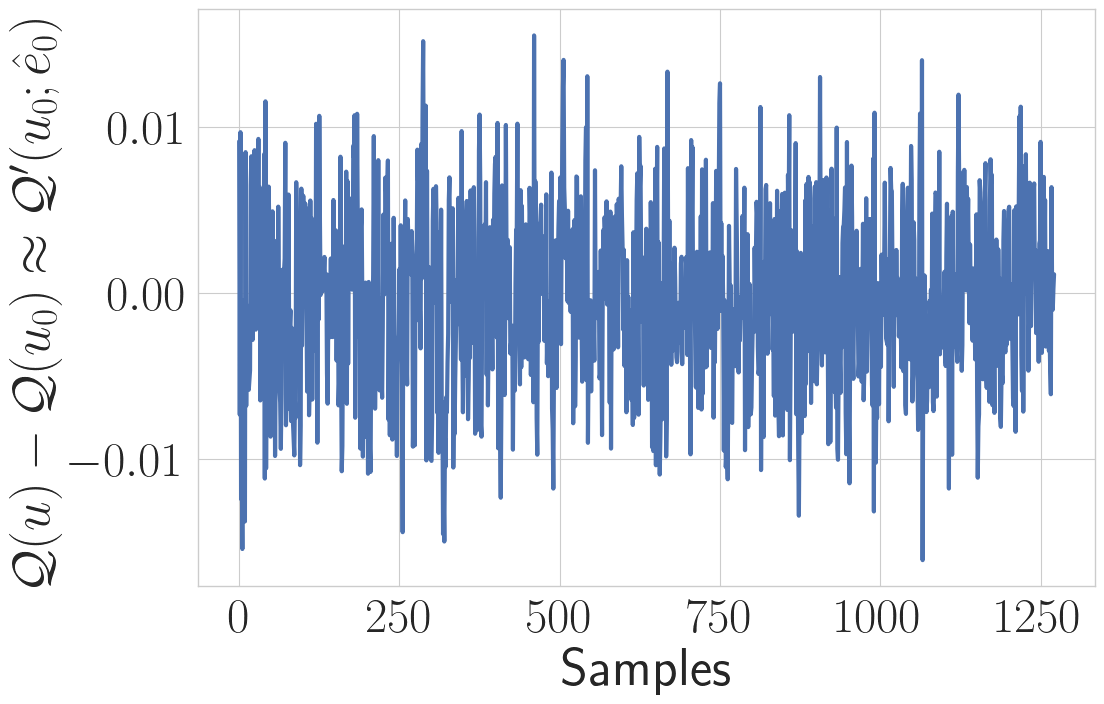

In [30]:
plot(qoi_burn, xl=r'Samples', \
     yl=r"$\mathcal{Q}(u) - \mathcal{Q}(u_0) \approx \mathcal{Q}'(u_0; \hat{e}_0)$", \
     savefig = savefig, savefile = sfpath + 'qoi_burn.pdf', figsize=[12,8])

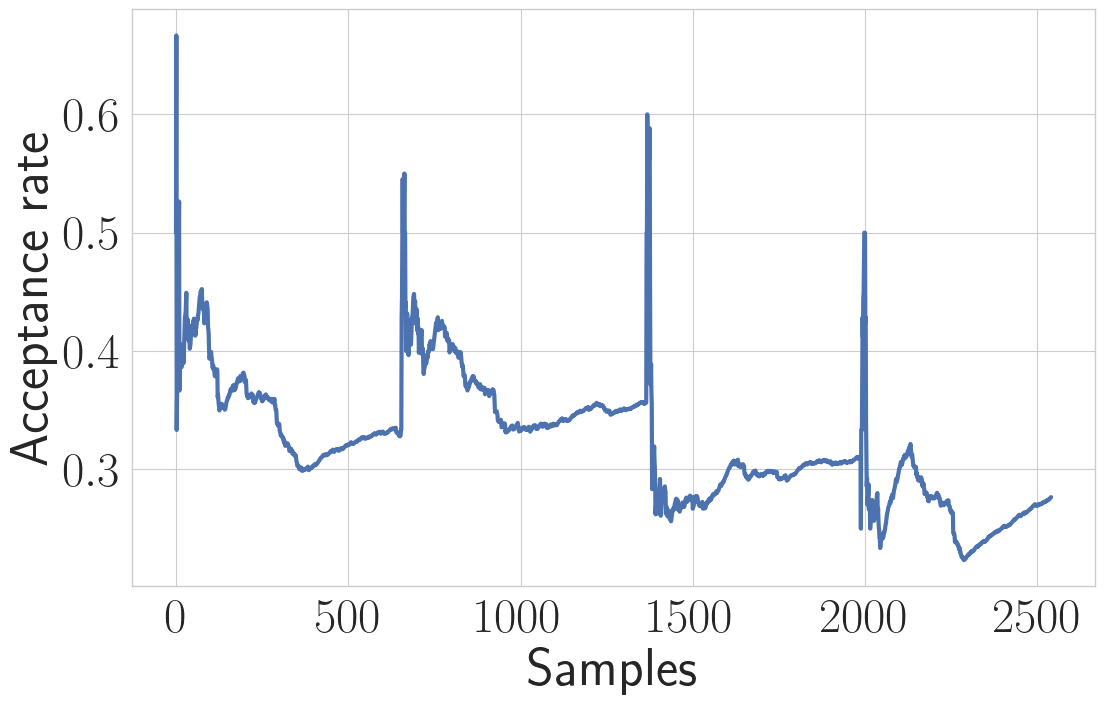

In [31]:
plot(acc, xl = r'Samples', yl= r'Acceptance rate', \
     savefig = savefig, savefile = sfpath + 'acc.pdf', figsize=[12,8])

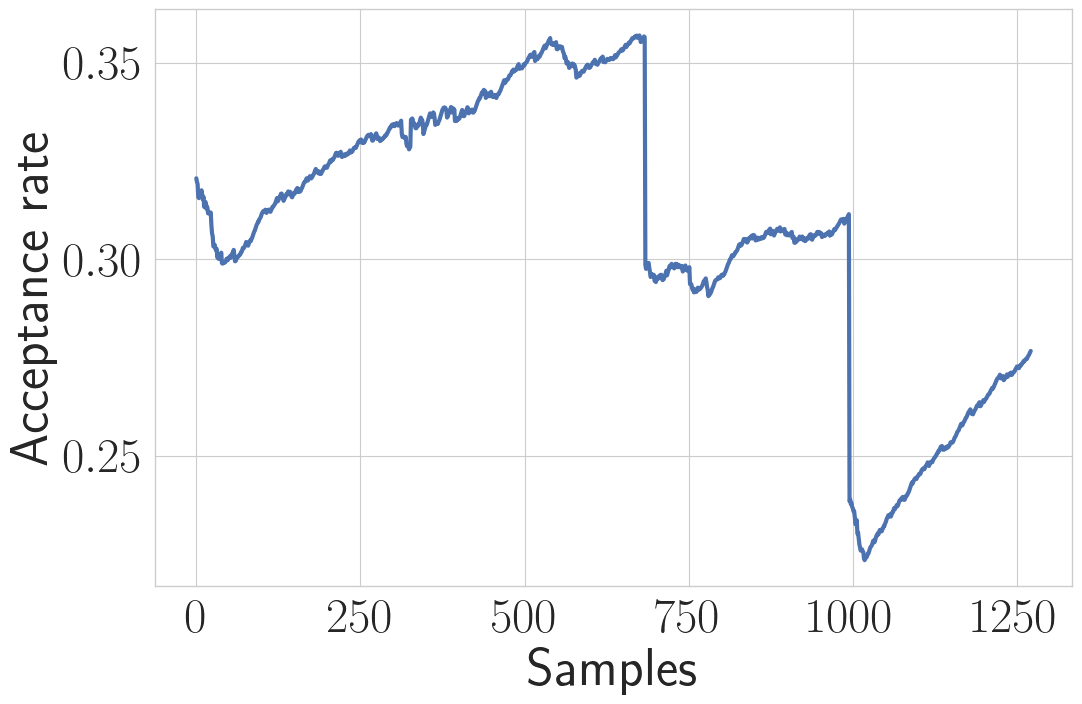

In [32]:
plot(acc_burn, xl = r'Samples', yl= r'Acceptance rate', \
     savefig = savefig, savefile = sfpath + 'acc_burn.pdf', figsize=[12,8])

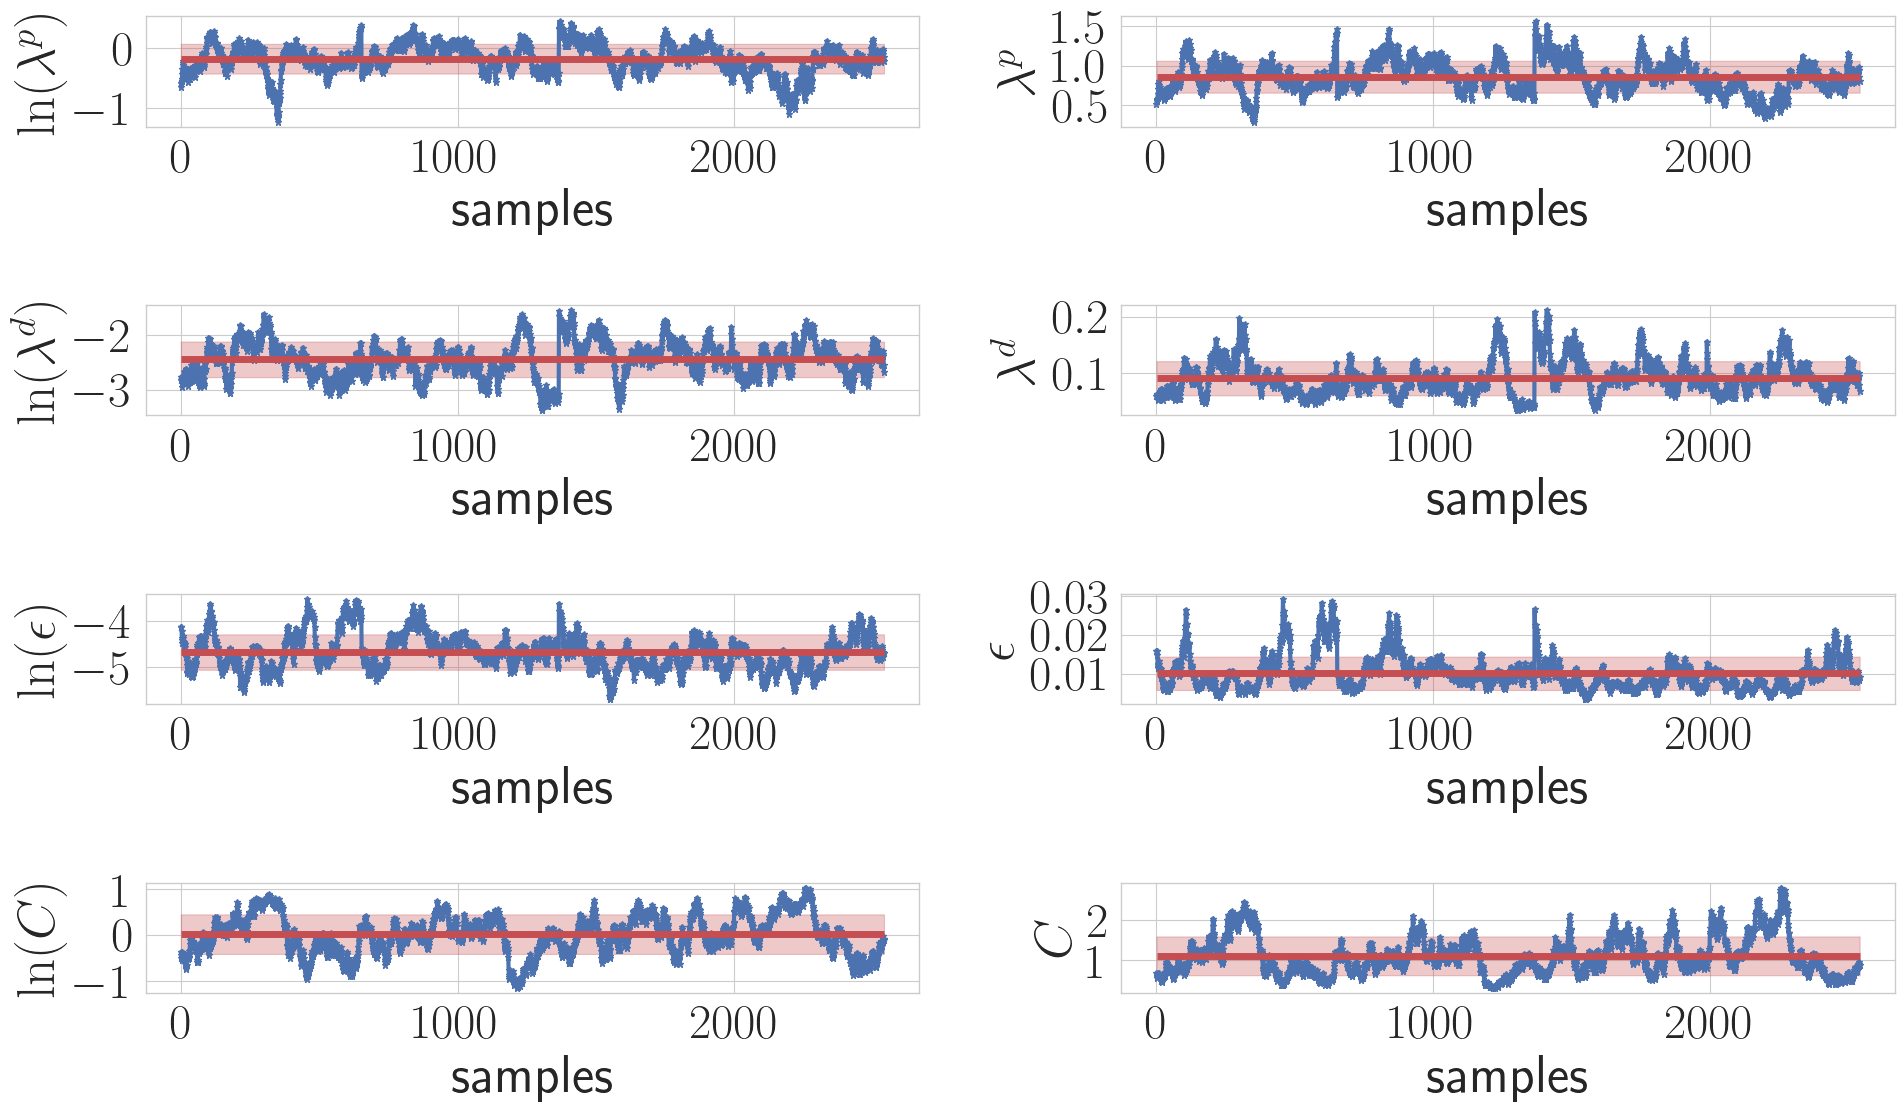

In [33]:
plot_samples = samples

fig, axs = plt.subplots(nrows=param_dim, ncols=2, figsize=(20, 12))

# get real samples
plot_samples_real = np.exp(plot_samples)

# get mean in ln and real spaces
plot_samples_mean = [np.mean(plot_samples[:, i]) for i in range(param_dim)]
plot_samples_std = [np.std(plot_samples[:, i]) for i in range(param_dim)]

plot_samples_mean_real = [np.mean(plot_samples_real[:, i]) for i in range(param_dim)]
plot_samples_std_real = [np.std(plot_samples_real[:, i]) for i in range(param_dim)]

samples_ids = np.arange(plot_samples.shape[0])
xmin = 1
xmax = samples_ids[-1]
idx = 0
for row in range (param_dim):
    col = 0
    axs[row, col].plot(samples_ids, plot_samples[:, idx], '*-')
    # plot mean line
    axs[row, col].hlines(plot_samples_mean[idx], xmin, xmax, color = 'r', lw = 5)
    
    axs[row, col].fill_between(samples_ids, \
                    plot_samples_mean[idx] - plot_samples_std[idx], \
                    plot_samples_mean[idx] + plot_samples_std[idx], \
                    alpha=0.3, color ='r')
    
    #axs[col].set_title(titles[idx])
    axs[row, col].set_xlabel('samples')
    axs[row, col].set_ylabel(titles[idx])
    
    col = 1
    axs[row, col].plot(samples_ids, plot_samples_real[:, idx], '*-')
    # plot mean line
    axs[row, col].hlines(plot_samples_mean_real[idx], xmin, xmax, color = 'r', lw = 5)
    
    axs[row, col].fill_between(samples_ids, \
                    plot_samples_mean_real[idx] - plot_samples_std_real[idx], \
                    plot_samples_mean_real[idx] + plot_samples_std_real[idx], \
                    alpha=0.3, color ='r')
    
    #axs[col].set_title(titles[idx])
    axs[row, col].set_xlabel('samples')
    axs[row, col].set_ylabel(titles_real[idx])
    
    idx +=1
    

plt.tight_layout()
#plt.xlabel('samples')
if savefig:
    plt.savefig(sfpath + 'samples.pdf')

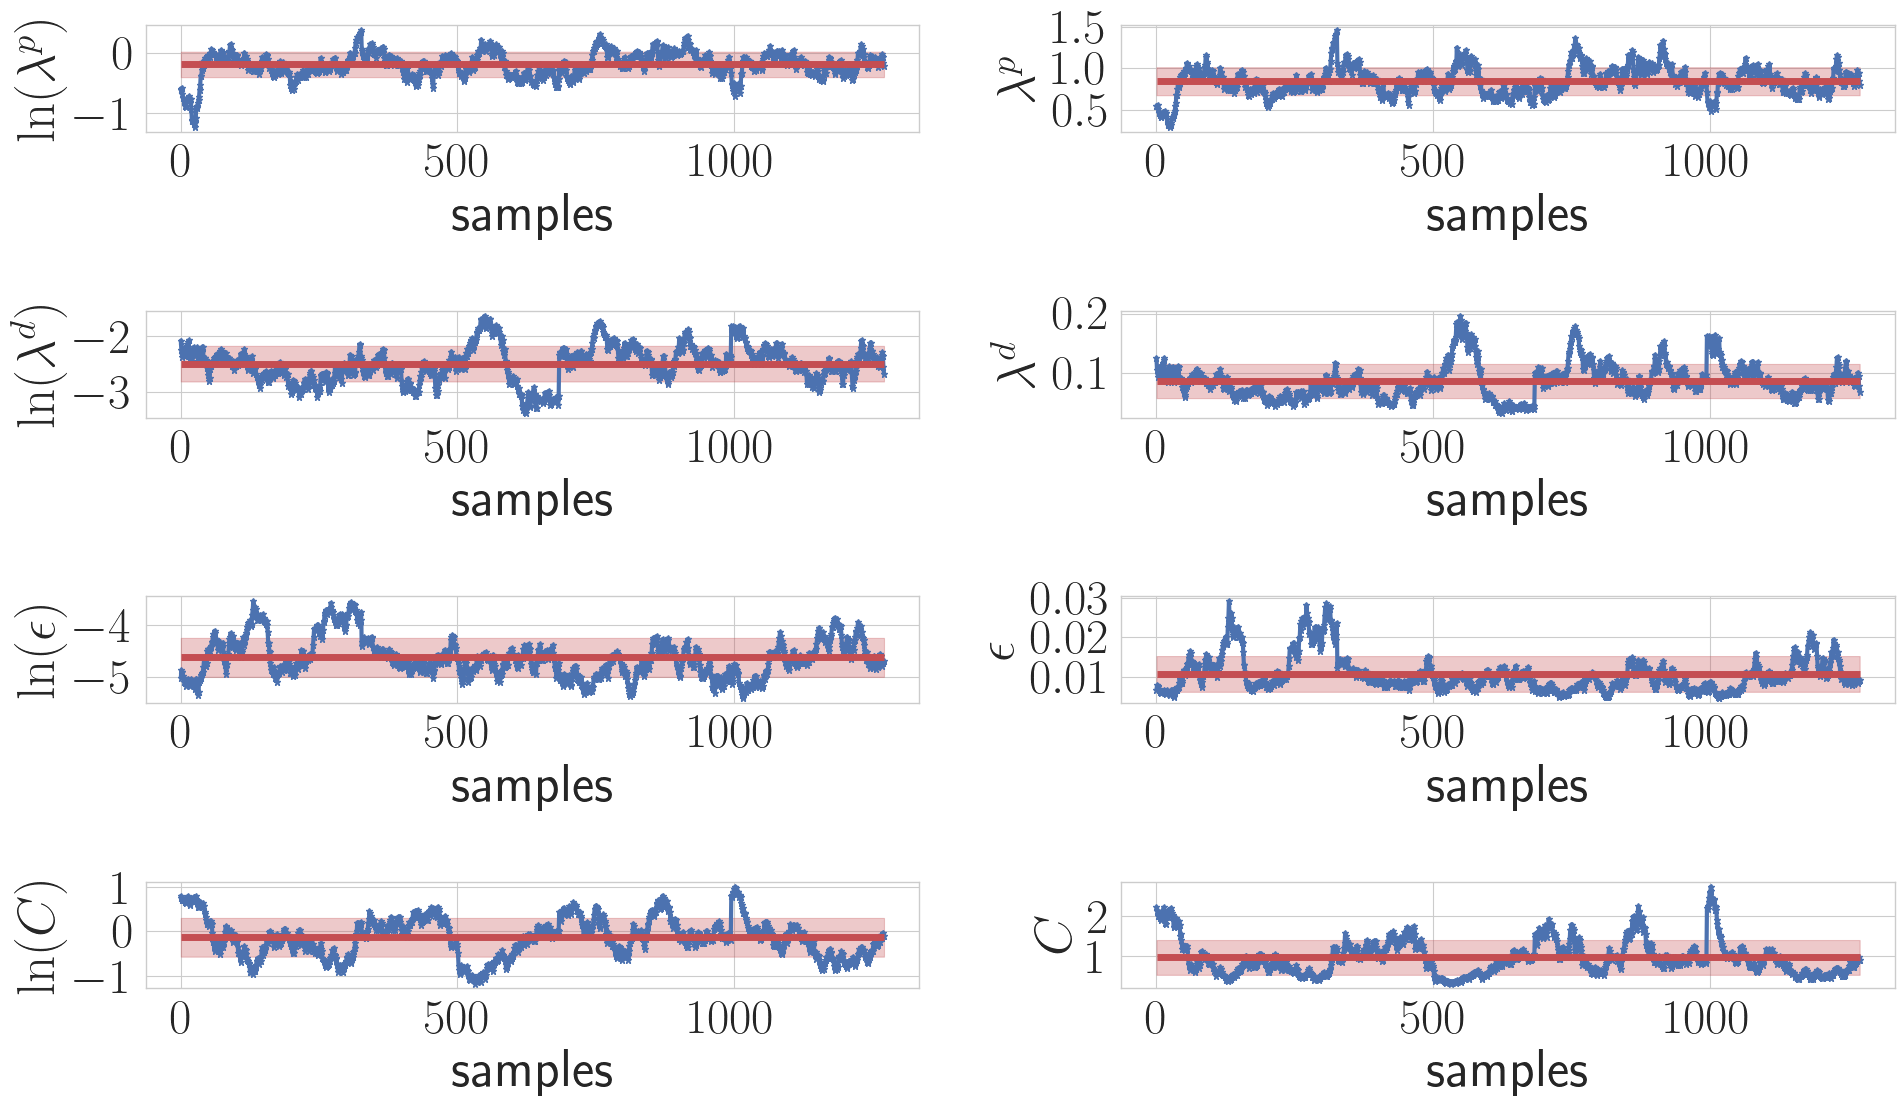

In [34]:
plot_samples = samples_burn

fig, axs = plt.subplots(nrows=param_dim, ncols=2, figsize=(20, 12))

# get real samples
plot_samples_real = np.exp(plot_samples)

# get mean in ln and real spaces
plot_samples_mean = [np.mean(plot_samples[:, i]) for i in range(param_dim)]
plot_samples_std = [np.std(plot_samples[:, i]) for i in range(param_dim)]

plot_samples_mean_real = [np.mean(plot_samples_real[:, i]) for i in range(param_dim)]
plot_samples_std_real = [np.std(plot_samples_real[:, i]) for i in range(param_dim)]

samples_ids = np.arange(plot_samples.shape[0])
xmin = 1
xmax = samples_ids[-1]
idx = 0
for row in range (param_dim):
    col = 0
    axs[row, col].plot(samples_ids, plot_samples[:, idx], '*-')
    # plot mean line
    axs[row, col].hlines(plot_samples_mean[idx], xmin, xmax, color = 'r', lw = 5)
    
    axs[row, col].fill_between(samples_ids, \
                    plot_samples_mean[idx] - plot_samples_std[idx], \
                    plot_samples_mean[idx] + plot_samples_std[idx], \
                    alpha=0.3, color ='r')
    
    #axs[col].set_title(titles[idx])
    axs[row, col].set_xlabel('samples')
    axs[row, col].set_ylabel(titles[idx])
    
    col = 1
    axs[row, col].plot(samples_ids, plot_samples_real[:, idx], '*-')
    # plot mean line
    axs[row, col].hlines(plot_samples_mean_real[idx], xmin, xmax, color = 'r', lw = 5)
    
    axs[row, col].fill_between(samples_ids, \
                    plot_samples_mean_real[idx] - plot_samples_std_real[idx], \
                    plot_samples_mean_real[idx] + plot_samples_std_real[idx], \
                    alpha=0.3, color ='r')
    
    #axs[col].set_title(titles[idx])
    axs[row, col].set_xlabel('samples')
    axs[row, col].set_ylabel(titles_real[idx])
    
    idx +=1
    

plt.tight_layout()
#plt.xlabel('samples')
if savefig:
    plt.savefig(sfpath + 'samples_burn.pdf')

## Prior and posterior

/tmp/ipykernel_1193912/3060688893.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prior_samples[:, idx], hist=False, ax=cax, \
/tmp/ipykernel_1193912/3060688893.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(plot_samples[:, idx], hist=False, bins = 25, ax=cax,  

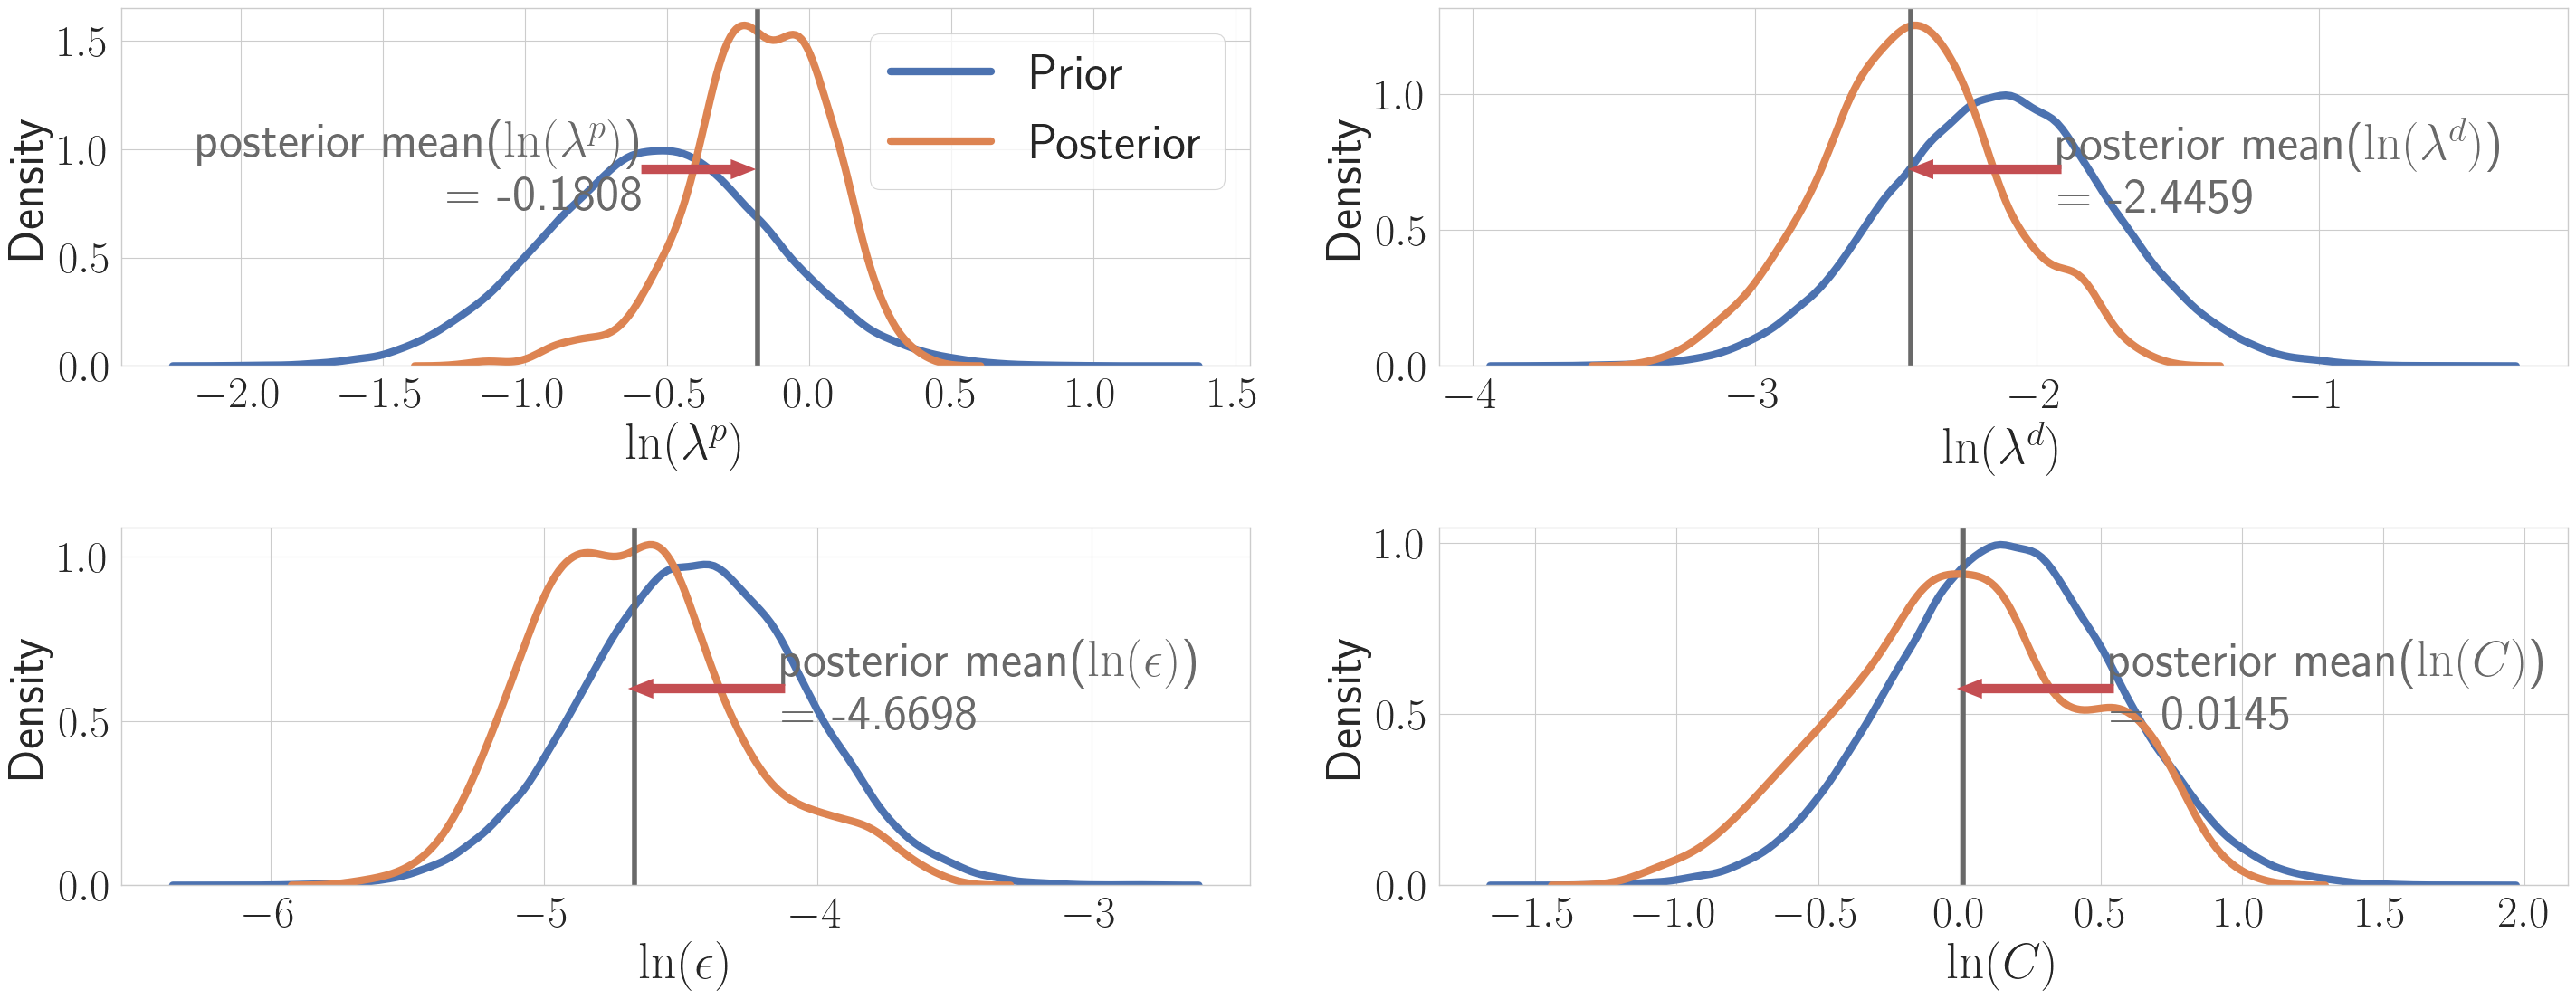

In [35]:
plot_samples = samples

# get mean 
plot_samples_mean = [np.mean(plot_samples[:, i]) for i in range(param_dim)]
plot_samples_std = [np.std(plot_samples[:, i]) for i in range(param_dim)]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (30, 12))
lw = 6
lw_sm = 4
fs = 40

idx = 0
for plot_i in range(param_dim):
    row = 0 if plot_i < 2 else 1
    col = plot_i if plot_i < 2 else plot_i - 2
    
    cax = axs[row, col]
    # prior
    sns.distplot(prior_samples[:, idx], hist=False, ax=cax, \
                 label='Prior', \
                 kde_kws={"lw": lw})
    # posterior
    ax = sns.distplot(plot_samples[:, idx], hist=False, bins = 25, ax=cax,  \
                 label='Posterior', \
                 kde_kws={"lw": lw})
    
    xlims = ax.get_xlim()
    ylims = ax.get_ylim()
    dx_lims = xlims[1] - xlims[0]
    dy_lims = ylims[1] - ylims[0]
    
    vline_x = plot_samples_mean[idx]
    
    text_y = 0.55 * (ylims[0] + ylims[1])
    text_x = vline_x + 0.13 * dx_lims
    text_ha_align = 'left'
    
    arrow_width = 0.005 * dy_lims
    arrow_head_width = 5 * arrow_width
    arrow_head_length = 0.01 * dx_lims
    
    arrow_dx = vline_x - text_x + 10 * arrow_width
    
    if xlims[1] - text_x < 0.4 * dx_lims:
        text_x = vline_x - 0.1 * dx_lims
        text_ha_align = 'right'
        arrow_dx = vline_x - text_x - 10 * arrow_width
    

    cax.axvline(x=vline_x, color='dimgray', lw = lw_sm)
    cax.text(text_x, text_y, \
                       r'posterior mean(' + titles[idx] + r')' + '\n' + r'= ' + '%6.4f' % (vline_x), \
                       color = 'dimgray', va = 'center', ha = text_ha_align, fontsize = fs, zorder=10)
    
    
    cax.arrow(text_x, text_y, dx = arrow_dx, dy = 0, \
                   color = 'r', lw = lw, \
                   width = arrow_width, \
                   head_width = arrow_head_width, head_length = arrow_head_length, zorder=10)
    
        
    cax.set_xlabel(titles[idx], fontsize = fs)
    cax.set_ylabel(r"Density", fontsize = fs)
    if col == 0 and row == 0:
        cax.legend(fancybox=True, fontsize = fs, loc = 'upper right')
    idx += 1
    
fig.tight_layout()
if savefig:
    plt.savefig(sfpath + 'prior_vs_posterior_validation.pdf')

/tmp/ipykernel_1193912/3977182522.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.exp(prior_samples[:, idx]), hist=False, ax=cax, \
/tmp/ipykernel_1193912/3977182522.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(plot_samples[:, idx], hist=False, bins = 25, a

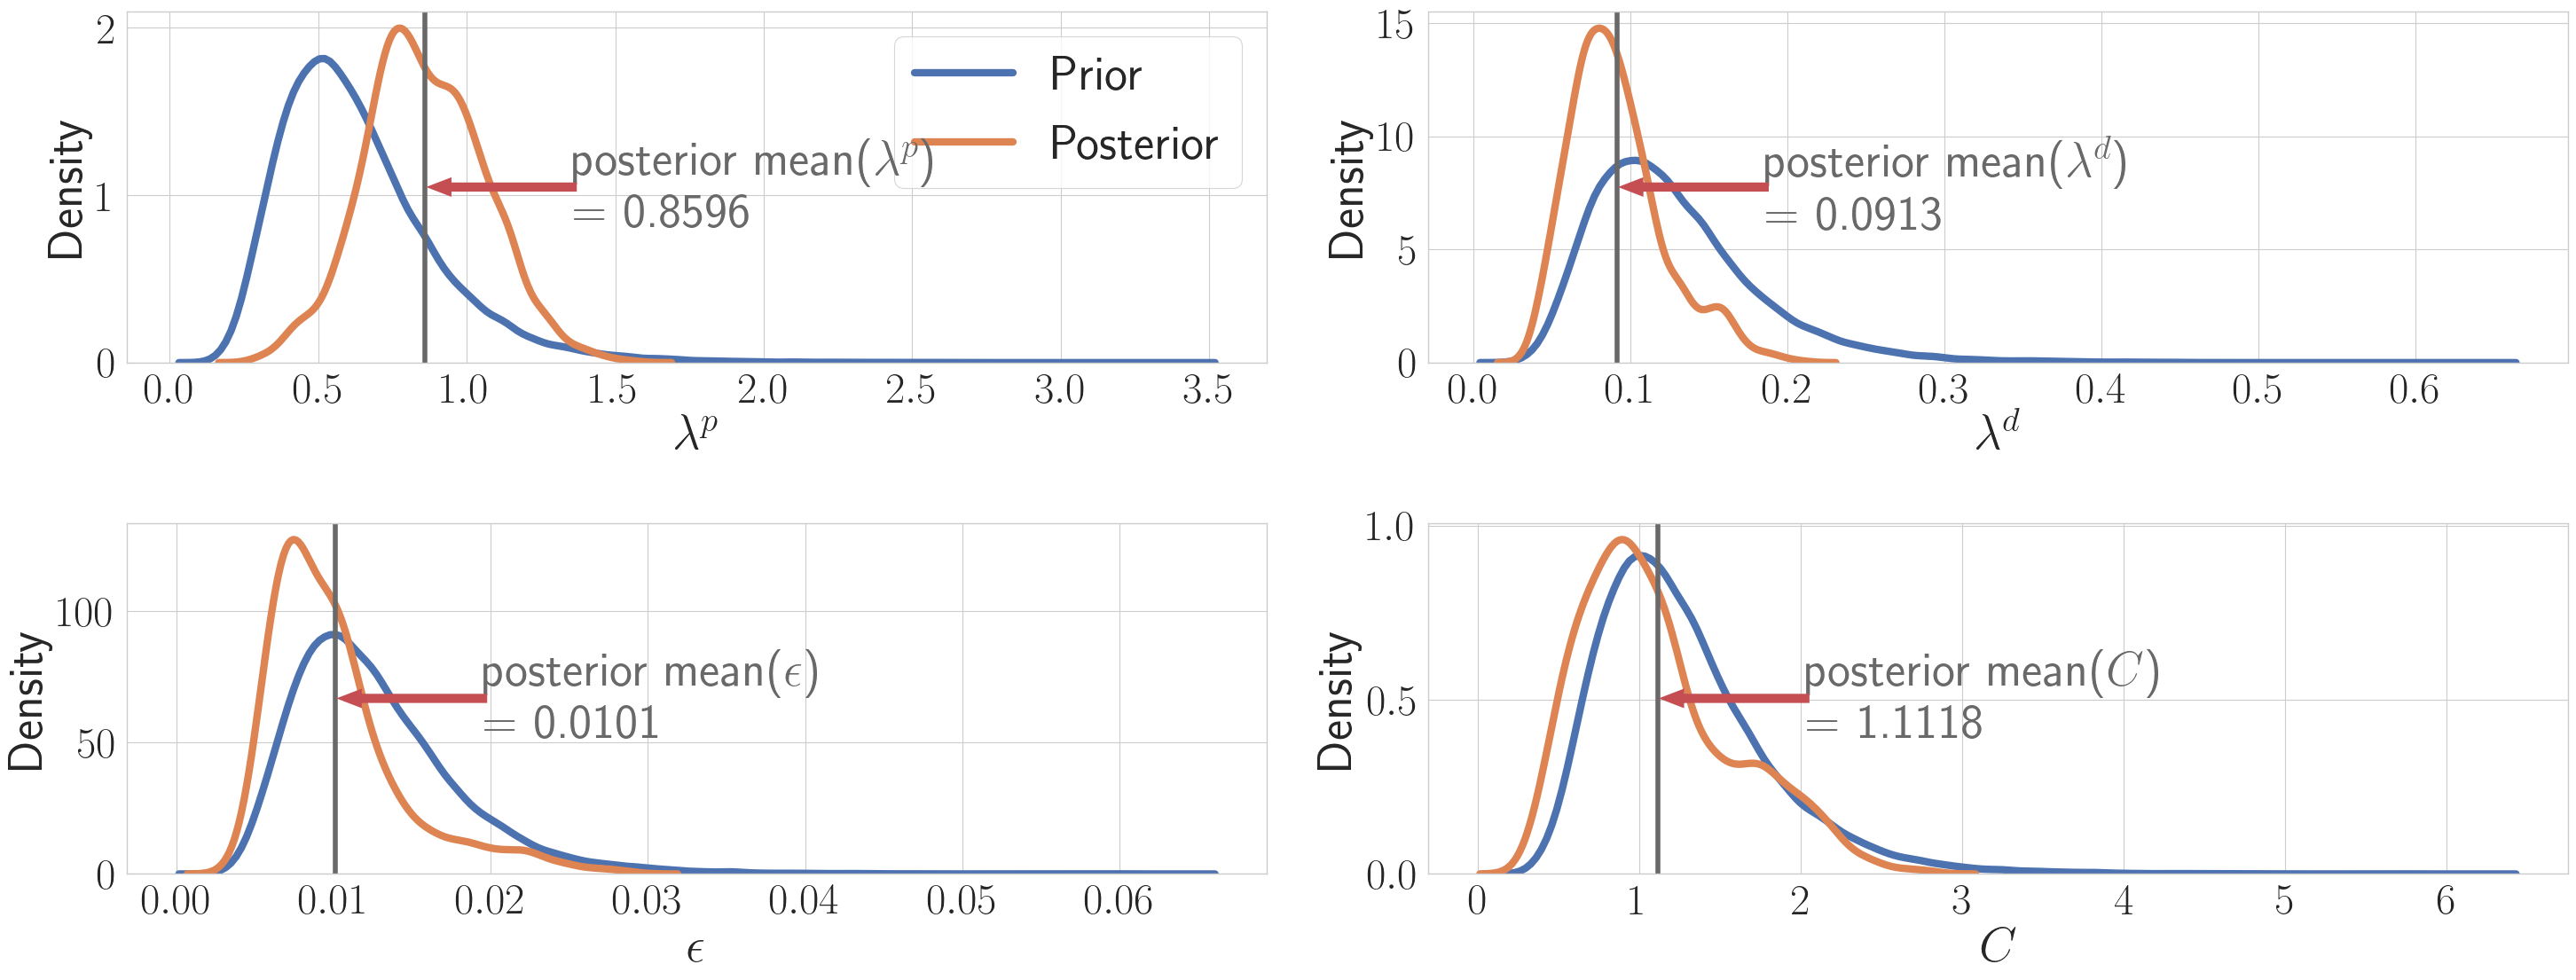

In [36]:
plot_samples = np.exp(samples)

# get mean 
plot_samples_mean = [np.mean(plot_samples[:, i]) for i in range(param_dim)]
plot_samples_std = [np.std(plot_samples[:, i]) for i in range(param_dim)]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (30, 12))
lw = 6
lw_sm = 4
fs = 40

idx = 0
for plot_i in range(param_dim):
    row = 0 if plot_i < 2 else 1
    col = plot_i if plot_i < 2 else plot_i - 2
    
    cax = axs[row, col]
    # prior
    sns.distplot(np.exp(prior_samples[:, idx]), hist=False, ax=cax, \
                 label='Prior', \
                 kde_kws={"lw": lw})
    # posterior
    ax = sns.distplot(plot_samples[:, idx], hist=False, bins = 25, ax=cax,  \
                 label='Posterior', \
                 kde_kws={"lw": lw})
    
    xlims = cax.get_xlim()
    ylims = cax.get_ylim()
    dx_lims = xlims[1] - xlims[0]
    dy_lims = ylims[1] - ylims[0]
    
    vline_x = plot_samples_mean[idx]
    
    text_y = ylims[0] + 0.5 * (ylims[1] - ylims[0])
    text_x = vline_x + 0.13 * dx_lims
    text_ha_align = 'left'
    
    arrow_width = 0.005 * dy_lims
    arrow_head_width = 5 * arrow_width
    arrow_head_length = 0.01 * dx_lims
    
    arrow_dx = vline_x - text_x + 0.02 * dx_lims
    
    #if xlims[1] - text_x < 0.4 * dx_lims:
    #    text_x = vline_x - 0.1 * dx_lims
    #    text_ha_align = 'right'
    #    arrow_dx = vline_x - text_x - 10 * arrow_width
    

    cax.axvline(x=vline_x, color='dimgray', lw = lw_sm)
    cax.text(text_x, text_y, \
                       r'posterior mean(' + titles_real[idx] + r')' + '\n' + r'= ' + '%6.4f' % (vline_x), \
                       color = 'dimgray', va = 'center', ha = text_ha_align, fontsize = fs, zorder=10)
    
    
    cax.arrow(text_x, text_y, dx = arrow_dx, dy = 0, \
                   color = 'r', lw = lw, \
                   width = arrow_width, \
                   head_width = arrow_head_width, head_length = arrow_head_length, zorder=10)
    
        
    cax.set_xlabel(titles_real[idx], fontsize = fs)
    cax.set_ylabel(r"Density", fontsize = fs)
    if col == 0 and row == 0:
        cax.legend(fancybox=True, fontsize = fs, loc = 'upper right')
    idx += 1
    
fig.tight_layout()
if savefig:
    plt.savefig(sfpath + 'prior_vs_posterior_real_validation.pdf')

/tmp/ipykernel_1193912/2771599876.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prior_samples[:, idx], hist=False, ax=cax, \
/tmp/ipykernel_1193912/2771599876.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(plot_samples[:, idx], hist=False, bins = 25, ax=cax,  

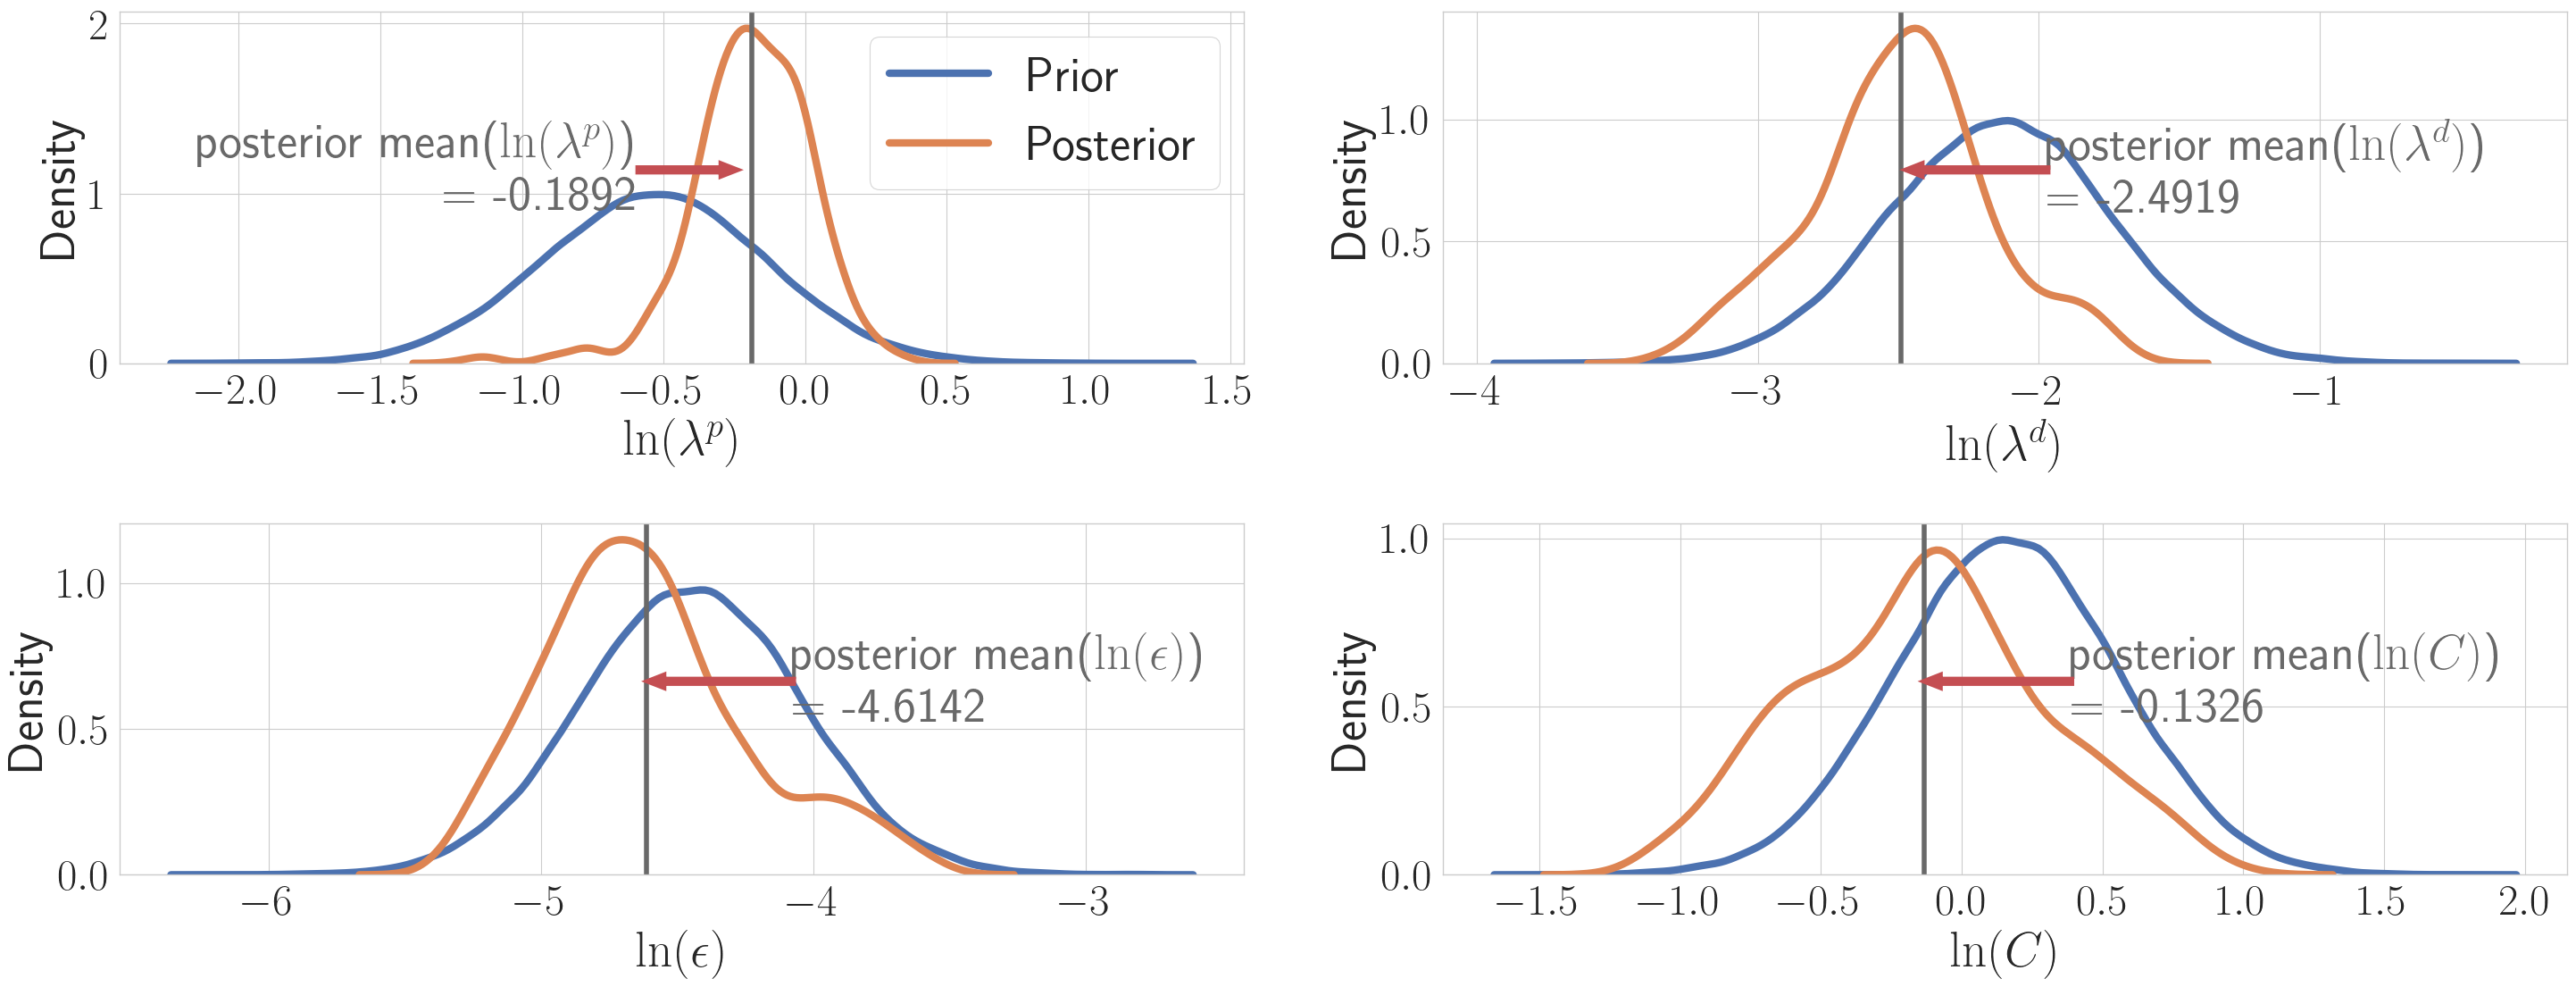

In [37]:
plot_samples = samples_burn

# get mean 
plot_samples_mean = [np.mean(plot_samples[:, i]) for i in range(param_dim)]
plot_samples_std = [np.std(plot_samples[:, i]) for i in range(param_dim)]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (30, 12))
lw = 6
lw_sm = 4
fs = 40

idx = 0
for plot_i in range(param_dim):
    row = 0 if plot_i < 2 else 1
    col = plot_i if plot_i < 2 else plot_i - 2
    
    cax = axs[row, col]
    # prior
    sns.distplot(prior_samples[:, idx], hist=False, ax=cax, \
                 label='Prior', \
                 kde_kws={"lw": lw})
    # posterior
    ax = sns.distplot(plot_samples[:, idx], hist=False, bins = 25, ax=cax,  \
                 label='Posterior', \
                 kde_kws={"lw": lw})
    
    xlims = ax.get_xlim()
    ylims = ax.get_ylim()
    dx_lims = xlims[1] - xlims[0]
    dy_lims = ylims[1] - ylims[0]
    
    vline_x = plot_samples_mean[idx]
    
    text_y = 0.55 * (ylims[0] + ylims[1])
    text_x = vline_x + 0.13 * dx_lims
    text_ha_align = 'left'
    
    arrow_width = 0.005 * dy_lims
    arrow_head_width = 5 * arrow_width
    arrow_head_length = 0.01 * dx_lims
    
    arrow_dx = vline_x - text_x + 10 * arrow_width
    
    if xlims[1] - text_x < 0.4 * dx_lims:
        text_x = vline_x - 0.1 * dx_lims
        text_ha_align = 'right'
        arrow_dx = vline_x - text_x - 10 * arrow_width
    

    cax.axvline(x=vline_x, color='dimgray', lw = lw_sm)
    cax.text(text_x, text_y, \
                       r'posterior mean(' + titles[idx] + r')' + '\n' + r'= ' + '%6.4f' % (vline_x), \
                       color = 'dimgray', va = 'center', ha = text_ha_align, fontsize = fs, zorder=10)
    
    
    cax.arrow(text_x, text_y, dx = arrow_dx, dy = 0, \
                   color = 'r', lw = lw, \
                   width = arrow_width, \
                   head_width = arrow_head_width, head_length = arrow_head_length, zorder=10)
    
        
    cax.set_xlabel(titles[idx], fontsize = fs)
    cax.set_ylabel(r"Density", fontsize = fs)
    if col == 0 and row == 0:
        cax.legend(fancybox=True, fontsize = fs, loc = 'upper right')
    idx += 1
    
fig.tight_layout()
if savefig:
    plt.savefig(sfpath + 'prior_vs_posterior_validation_burn.pdf')

/tmp/ipykernel_1193912/3412184919.py:19: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.exp(prior_samples[:, idx]), hist=False, ax=cax, \
/tmp/ipykernel_1193912/3412184919.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(plot_samples[:, idx], hist=False, bins = 25, a

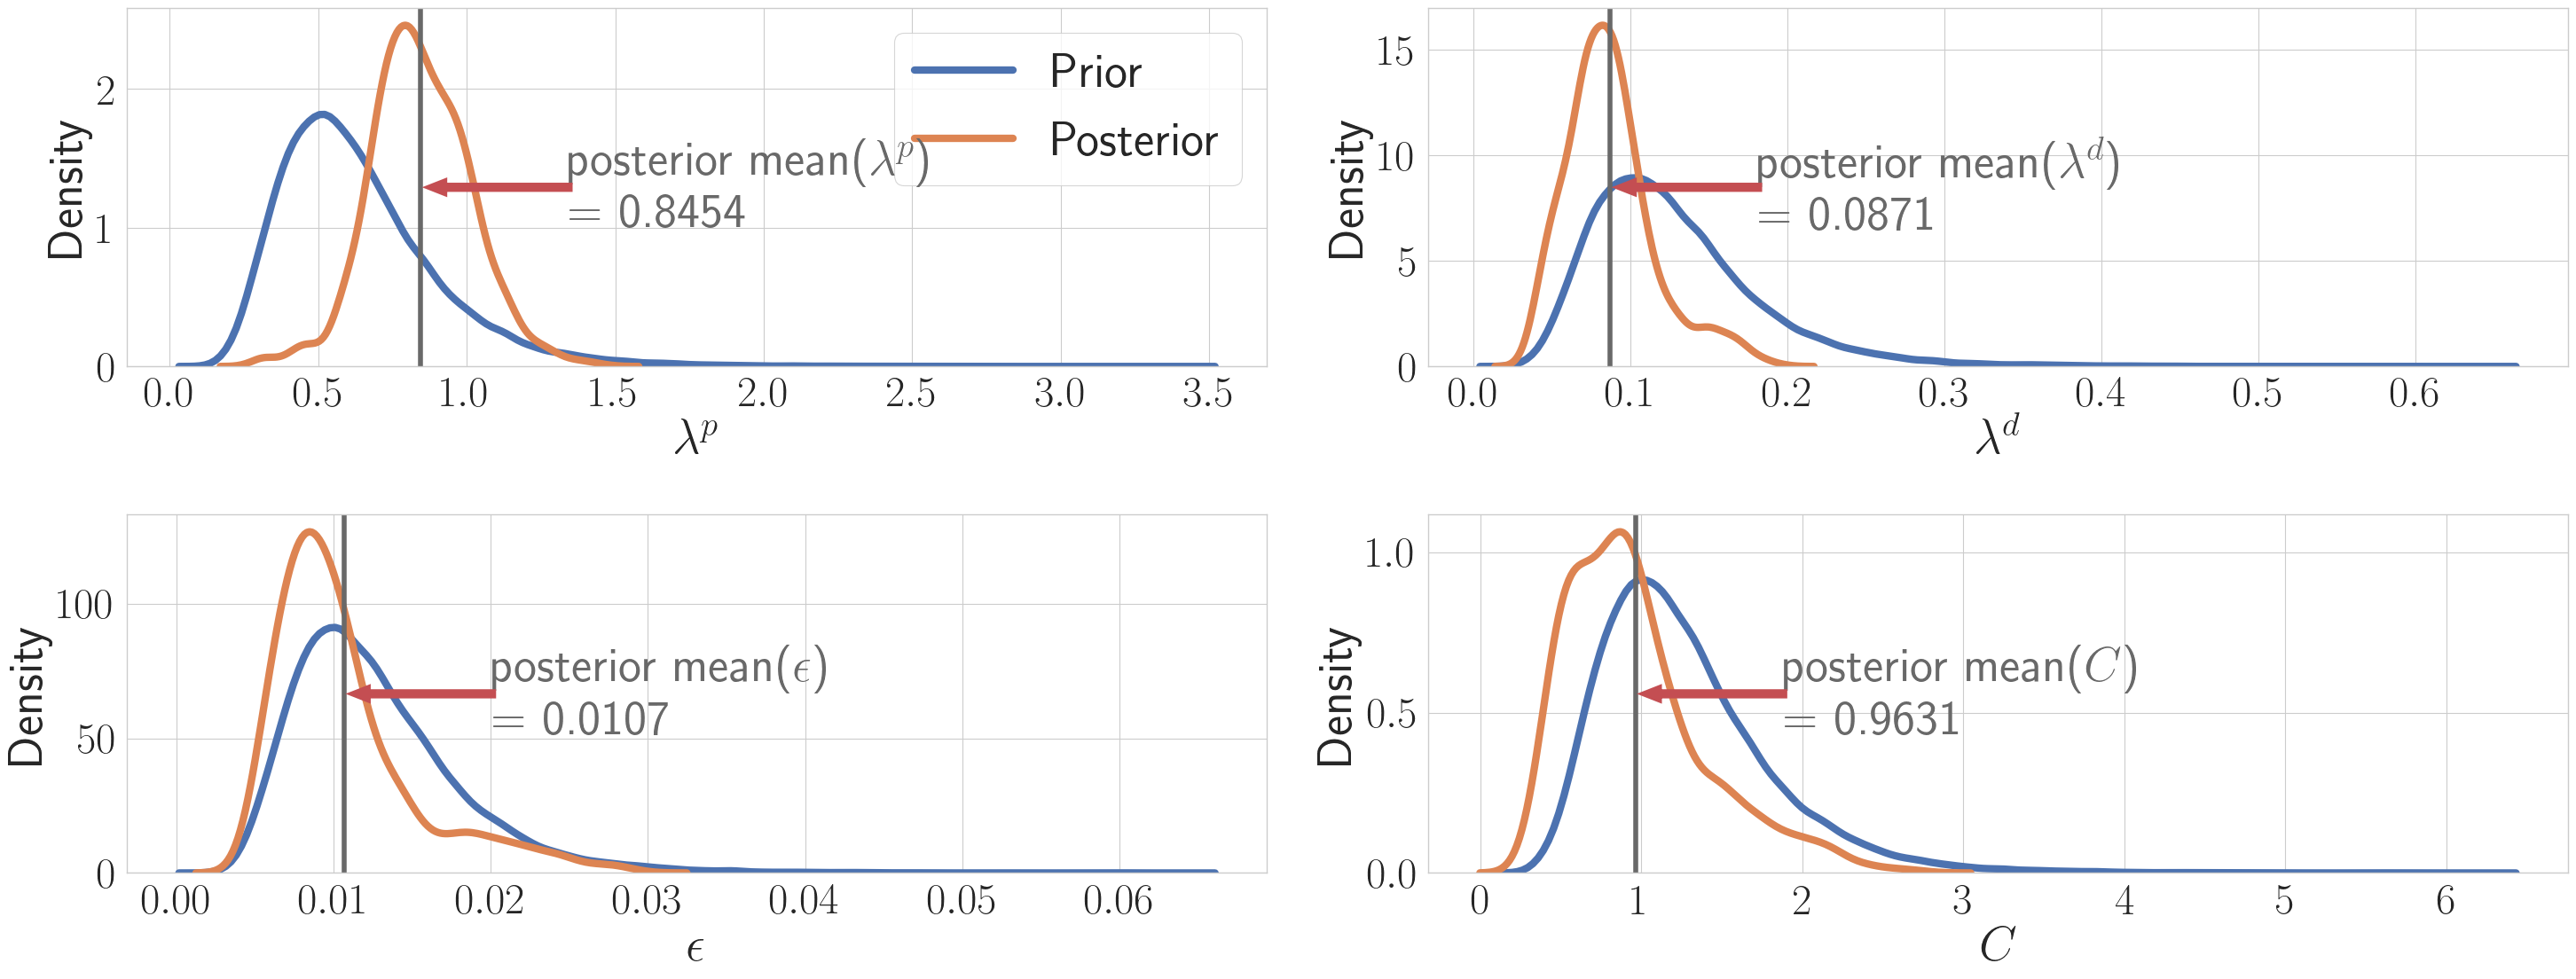

In [38]:
plot_samples = np.exp(samples_burn)

# get mean 
plot_samples_mean = [np.mean(plot_samples[:, i]) for i in range(param_dim)]
plot_samples_std = [np.std(plot_samples[:, i]) for i in range(param_dim)]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize = (30, 12))
lw = 6
lw_sm = 4
fs = 40

idx = 0
for plot_i in range(param_dim):
    row = 0 if plot_i < 2 else 1
    col = plot_i if plot_i < 2 else plot_i - 2
    
    cax = axs[row, col]
    # prior
    sns.distplot(np.exp(prior_samples[:, idx]), hist=False, ax=cax, \
                 label='Prior', \
                 kde_kws={"lw": lw})
    # posterior
    ax = sns.distplot(plot_samples[:, idx], hist=False, bins = 25, ax=cax,  \
                 label='Posterior', \
                 kde_kws={"lw": lw})
    
    xlims = cax.get_xlim()
    ylims = cax.get_ylim()
    dx_lims = xlims[1] - xlims[0]
    dy_lims = ylims[1] - ylims[0]
    
    vline_x = plot_samples_mean[idx]
    
    text_y = ylims[0] + 0.5 * (ylims[1] - ylims[0])
    text_x = vline_x + 0.13 * dx_lims
    text_ha_align = 'left'
    
    arrow_width = 0.005 * dy_lims
    arrow_head_width = 5 * arrow_width
    arrow_head_length = 0.01 * dx_lims
    
    arrow_dx = vline_x - text_x + 0.02 * dx_lims
    
    #if xlims[1] - text_x < 0.4 * dx_lims:
    #    text_x = vline_x - 0.1 * dx_lims
    #    text_ha_align = 'right'
    #    arrow_dx = vline_x - text_x - 10 * arrow_width
    

    cax.axvline(x=vline_x, color='dimgray', lw = lw_sm)
    cax.text(text_x, text_y, \
                       r'posterior mean(' + titles_real[idx] + r')' + '\n' + r'= ' + '%6.4f' % (vline_x), \
                       color = 'dimgray', va = 'center', ha = text_ha_align, fontsize = fs, zorder=10)
    
    
    cax.arrow(text_x, text_y, dx = arrow_dx, dy = 0, \
                   color = 'r', lw = lw, \
                   width = arrow_width, \
                   head_width = arrow_head_width, head_length = arrow_head_length, zorder=10)
    
        
    cax.set_xlabel(titles_real[idx], fontsize = fs)
    cax.set_ylabel(r"Density", fontsize = fs)
    if col == 0 and row == 0:
        cax.legend(fancybox=True, fontsize = fs, loc = 'upper right')
    idx += 1
    
fig.tight_layout()
if savefig:
    plt.savefig(sfpath + 'prior_vs_posterior_real_validation_burn.pdf')

# Corner plot

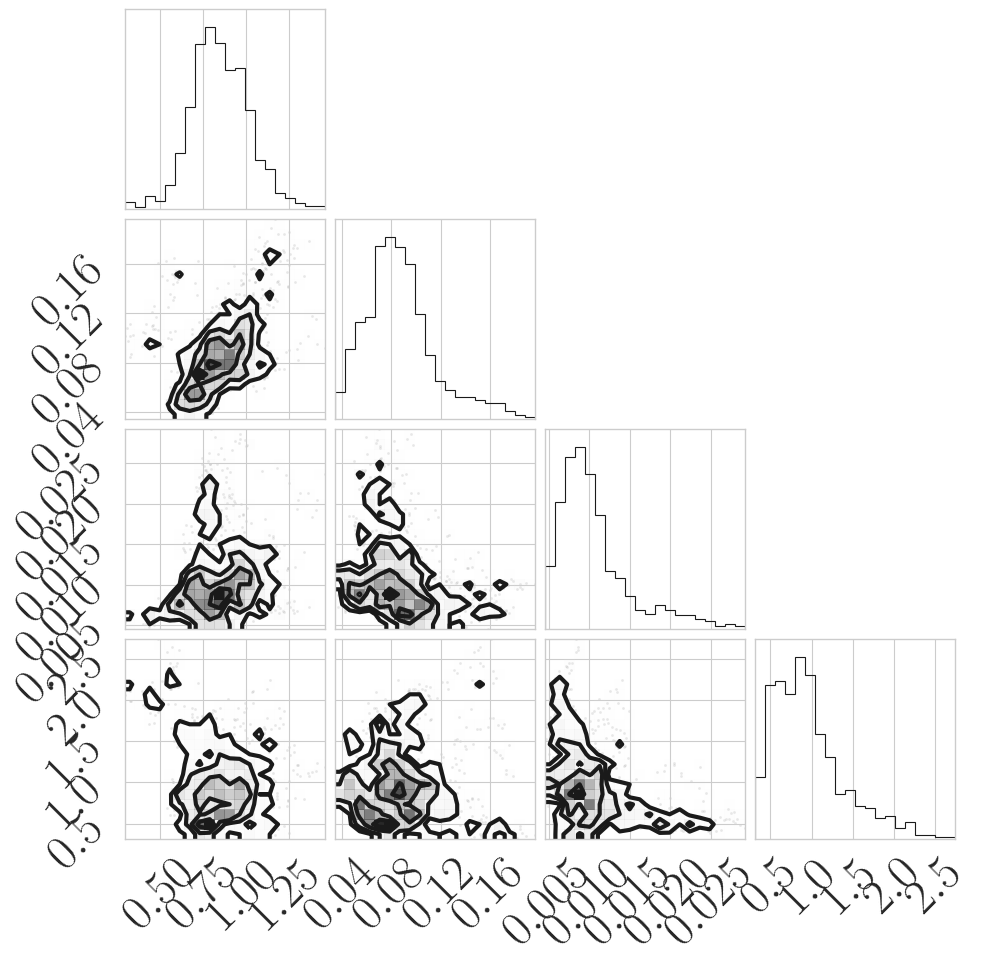

In [39]:
import corner

plot_samples = np.exp(samples_burn)
figure = corner.corner(plot_samples)

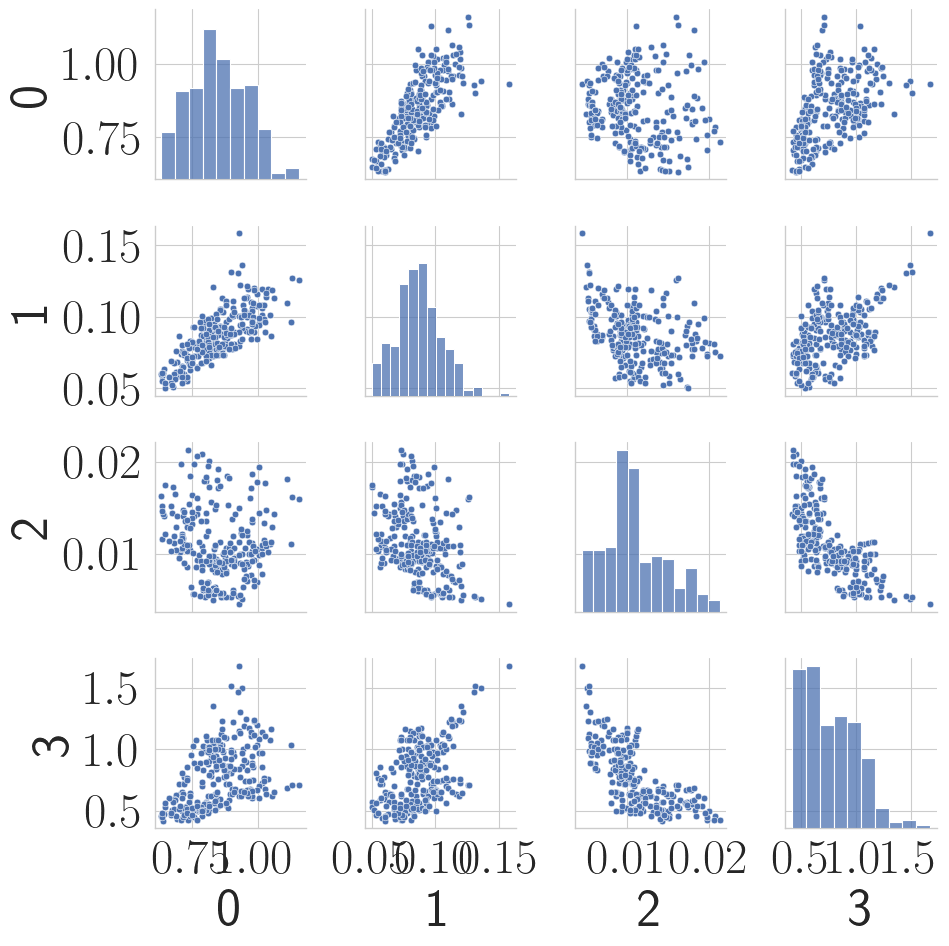

In [40]:
import pandas as pd

chop_n = int(0.8 * len(samples_burn))
plot_samples = np.exp(samples_burn[chop_n:])
df = pd.DataFrame(plot_samples)
df

sns.pairplot(df)
plt.show()

# Compute error in QoI at prior sample

In [47]:
## set pde flags
pde.save = True
#pde.verbosity = 3
pde.out_path = out_path_chain
pde.sim_out_freq = 1
pde.solveFwdBck_save_err = True

dl.set_log_active(False)

In [49]:
## solve linear model
print("\n\nGetting low-fidelity solution\n")
pde.save_suf = ''
pde.solveFwdBckLF(True, True, save_lf_visual = True)



Getting low-fidelity solution

Solve LF with parameters [0.2, 0.1, 0.05]


In [50]:
f = open(sfpath + 'model_run.log', 'w')
m_test = dl.Vector()
prior.sample(noise, m_test)
print('test parameter: {}'.format(np.exp(m_test.get_local())))
save_suf = 'at_prior_sample'

msg = run_and_compare_approximations(m_test, pde, save_suf)

print(msg)
f.write(msg)

test parameter: [0.32723757 0.05637604 0.01373436 2.17916426]


save_suf = at_prior_sample




 Test parameters = [0.32723757 0.05637604 0.01373436 2.17916426]




Solve original forward and dual problem

Solve with parameters [0.32723757 0.05637604 0.01373436 2.17916426]


Solve for approximate errors

Solve with parameters [0.32723757 0.05637604 0.01373436 2.17916426]

 *** comparing various estimates ***


Q(u0) = 1.1923454107206624


QoI using exact

Q(u) = 1.0537398406500464

Error Q(u) - Q(u0) = -0.1386055700706159, Percent error = -11.624615553880622

Estimate 1 Q(u) - Q(u0) = 0.38944671098604006, Percent error = 32.66223927097229

Estimate 2 Q(u) - Q(u0) = 1.2645571896431642, Percent error = 106.0562801913966

Estimate 3 Q(u) - Q(u0) = -0.08920240103875317, Percent error = -7.481255032032922


QoI using approximate


Q(u) = 1.0794722175187816

Error Q(u) - Q(u0) = -0.11287319320188072, Percent error = -9.46648447564027

Estimate 1 Q(u) - Q(u0) = 0.4311461584417479, Percent erro

975

In [ ]:
# # another sample to test error in QoI
# m_test_real = np.array([0.32723757, 0.05637604, 0.01373436, 2.17916426])
# m_test = np.log(m_test_real)
# print('test parameter: {}'.format(m_test_real))
# save_suf = 'at_custom_sample'

# msg = run_and_compare_approximations(m_test, pde, save_suf)

# f.writelines(msg)

# Compute error in QoI at mean of posterior

In [19]:
# mean and std (ln)
plot_samples = samples_burn

plot_samples_mean_ln = [np.mean(plot_samples[:, i]) for i in range(param_dim)]
plot_samples_std_ln = [np.std(plot_samples[:, i]) for i in range(param_dim)]

print('plot_samples_mean_ln = {}'.format(plot_samples_mean_ln))

print('exp(plot_samples_mean_ln) = {}'.format(np.exp(plot_samples_mean_ln)))

# mean and std (real)
plot_samples = np.exp(samples_burn)

plot_samples_mean_rl = [np.mean(plot_samples[:, i]) for i in range(param_dim)]
plot_samples_std_rl = [np.std(plot_samples[:, i]) for i in range(param_dim)]

print('plot_samples_mean_rl = {}'.format(plot_samples_mean_rl))

plot_samples_mean_ln = [-0.18917043982814144, -2.491948353582691, -4.614233210178444, -0.13255162690204791]
exp(plot_samples_mean_ln) = [0.82764543 0.08274859 0.00990978 0.87585772]
plot_samples_mean_rl = [0.8453694294072241, 0.08710974184788879, 0.010684474868543641, 0.9631112076312355]


In [20]:
plot_samples_mean_rl, plot_samples_std_rl

([0.8453694294072241,
  0.08710974184788879,
  0.010684474868543641,
  0.9631112076312355],
 [0.16833710181237954,
  0.028582230781757256,
  0.004553751968644788,
  0.43506311156916316])

In [52]:
m_test = np.log(np.array(plot_samples_mean_rl))
print('test parameter: {}'.format(plot_samples_mean_rl))
save_suf = 'at_posterior_real_mean'

msg = run_and_compare_approximations(m_test, pde, save_suf)

f.writelines(msg)

test parameter: [0.8453694294072241, 0.08710974184788879, 0.010684474868543641, 0.9631112076312355]


save_suf = at_posterior_real_mean




 Test parameters = [0.84536943 0.08710974 0.01068447 0.96311121]




Solve original forward and dual problem

Solve with parameters [0.84536943 0.08710974 0.01068447 0.96311121]


Solve for approximate errors

Solve with parameters [0.84536943 0.08710974 0.01068447 0.96311121]

 *** comparing various estimates ***


Q(u0) = 1.1923454107206624


QoI using exact

Q(u) = 1.1617192995242194

Error Q(u) - Q(u0) = -0.030626111196442984, Percent error = -2.5685603283307255

Estimate 1 Q(u) - Q(u0) = 0.47184601031597084, Percent error = 39.57292962873767

Estimate 2 Q(u) - Q(u0) = 0.6032039545326017, Percent error = 50.589699017503726

Estimate 3 Q(u) - Q(u0) = -0.029466929976390104, Percent error = -2.4713417531065995


QoI using approximate


Q(u) = 1.1756389615253737

Error Q(u) - Q(u0) = -0.01670644919528863, Percent error = -1.401141736704562

Estimat

In [53]:
m_test = plot_samples_mean_ln
print('test parameter: {}'.format(np.exp(plot_samples_mean_ln)))
save_suf = 'at_posterior_ln_mean'

msg = run_and_compare_approximations(m_test, pde, save_suf)

f.writelines(msg)

test parameter: [0.82764543 0.08274859 0.00990978 0.87585772]


save_suf = at_posterior_ln_mean




 Test parameters = [0.82764543 0.08274859 0.00990978 0.87585772]




Solve original forward and dual problem

Solve with parameters [0.82764543 0.08274859 0.00990978 0.87585772]


Solve for approximate errors

Solve with parameters [0.82764543 0.08274859 0.00990978 0.87585772]

 *** comparing various estimates ***


Q(u0) = 1.1923454107206624


QoI using exact

Q(u) = 1.169481862191574

Error Q(u) - Q(u0) = -0.02286354852908845, Percent error = -1.917527280561222

Estimate 1 Q(u) - Q(u0) = 0.47650378158490114, Percent error = 39.96356905478411

Estimate 2 Q(u) - Q(u0) = 0.57496282018342, Percent error = 48.221162677676446

Estimate 3 Q(u) - Q(u0) = -0.02626128404250272, Percent error = -2.202489631476017


QoI using approximate


Q(u) = 1.1852778037503169

Error Q(u) - Q(u0) = -0.007067606970345475, Percent error = -0.5927482847502856

Estimate 1 Q(u) - Q(u0) = 0.4885947967037594, Percen

In [54]:
f.close()